In [65]:
import os
import math
import sys
import time
import copy

import cv2

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns


In [66]:
"""
- get responsible files for our target time durations (e.g., 7am to 9am)
"""
DATA_COLUMNS_NAME = ['taxiID', 'lat', 'lng', 'alt', 'time', 'azim', 'vel', 'gpstype', 'occ']

DATA_BASEDIR = "/home/gskim/data/CE545 Taxi/data"

TARGET_DATE = "2018-04-02"
TARGET_DURATION = ["070000", "100000"]

taget_date_dir = os.path.join(DATA_BASEDIR, TARGET_DATE)
taget_date_files = os.listdir(taget_date_dir)
taget_date_files.sort()

taget_date_files_in_duration = []
for filename in taget_date_files:
    if TARGET_DURATION[0] < filename[:-4] and filename[:-4] < TARGET_DURATION[1]:
        taget_date_files_in_duration.append(filename)
print(taget_date_files_in_duration)
print("\nThe number of files: ", len(taget_date_files_in_duration))

['073230.DAT', '073500.DAT', '073730.DAT', '074000.DAT', '074230.DAT', '074500.DAT', '074730.DAT', '075000.DAT', '075230.DAT', '075500.DAT', '075730.DAT', '080000.DAT', '080230.DAT', '080500.DAT', '080730.DAT', '081000.DAT', '081230.DAT', '081500.DAT', '081730.DAT', '082000.DAT', '082230.DAT', '082500.DAT', '082730.DAT', '083000.DAT', '083230.DAT', '083500.DAT', '083730.DAT', '084000.DAT', '084230.DAT', '084500.DAT', '084730.DAT', '085000.DAT', '085230.DAT', '085500.DAT', '085730.DAT', '090000.DAT', '090230.DAT', '090500.DAT', '090730.DAT', '091000.DAT', '091230.DAT', '091500.DAT', '091730.DAT', '092000.DAT', '092230.DAT', '092500.DAT', '092730.DAT']

The number of files:  47


In [84]:
"""
- merge all (in that time zone) files 
- make data frame per each car 
"""

dfs = []
for filename in taget_date_files_in_duration:
    # read
    df_path = os.path.join(taget_date_dir, filename)
    df = pd.read_csv(df_path)
    df.columns = DATA_COLUMNS_NAME  

    # add
    dfs.append(df)

# merge and make all-in-one dataframe   
df_all = pd.concat(dfs)   

# for memory saving 
del dfs
df_all = df_all.drop("gpstype", axis=1)

In [85]:
# sort by taxi ID
# df_all = df_all.sort_values(["taxiID"], ascending=[True])
# df_all = df_all.reset_index(drop=True)

# grouping by taxi ID
taxi_grouped = df_all.groupby('taxiID')
taxi_grouped.count()

lat  lng  alt  time  azim  vel  occ
taxiID                                        
180000525   45   45   45    45    45   45   45
180000826  545  545  545   545   545  545  545
180002092  690  690  690   690   690  690  690
180002578   15   15   15    15    15   15   15
180003216  705  705  705   705   705  705  705
180100817  690  690  690   690   690  690  690
180103394  641  641  641   641   641  641  641
180104894  690  690  690   690   690  690  690
180105156    6    6    6     6     6    6    6
180105334  304  304  304   304   304  304  304
180105720  675  675  675   675   675  675  675
180106437  473  473  473   473   473  473  473
180106932  665  665  665   665   665  665  665
180106955  575  575  575   575   575  575  575
180106961  690  690  690   690   690  690  690
180107104  690  690  690   690   690  690  690
180107721  497  497  497   497   497  497  497
180109496  705  705  705   705   705  705  705
180109650  470  470  470   470   470  470  470
180109673  705  705  705   705   705  705  705
180110743  301  301  301   301   301  301  301
180110780  124  124  124   124   124  124  124
180111612  498  498  498   498   498  498  498
180111675  705  705  705   705   705  705  705
180111706  455  455  455   455   455  455  455
180111878  705  705  705   705   705  705  705
180111942  630  630  630   630   630  630  630
180112462  433  433  433   433   433  433  433
180113693  674  674  674   674   674  674  674
180113701   22   22   22    22    22   22   22
...        ...  ...  ...   ...   ...  ...  ...
180783458  496  496  496   496   496  496  496
180783460  705  705  705   705   705  705  705
180783462  495  495  495   495   495  495  495
180783466  705  705  705   705   705  705  705
180783467  285  285  285   285   285  285  285
180783469  543  543  543   543   543  543  543
180783470  274  274  274   274   274  274  274
180783485  705  705  705   705   705  705  705
180783503  705  705  705   705   705  705  705
180783529  705  705  705   705   705  705  705
180783530  127  127  127   127   127  127  127
180783531  705  705  705   705   705  705  705
180783536  635  635  635   635   635  635  635
180783540  705  705  705   705   705  705  705
180783553  675  675  675   675   675  675  675
180783557  645  645  645   645   645  645  645
180783571   60   60   60    60    60   60   60
180783573  129  129  129   129   129  129  129
180783574   27   27   27    27    27   27   27
180783611  700  700  700   700   700  700  700
180783612  705  705  705   705   705  705  705
180783613  705  705  705   705   705  705  705
180783614  700  700  700   700   700  700  700
180783615  680  680  680   680   680  680  680
180783636  705  705  705   705   705  705  705
180783640  330  330  330   330   330  330  330
180783653  540  540  540   540   540  540  540
180783668  225  225  225   225   225  225  225
180783670  600  600  600   600   600  600  600
180783671  645  645  645   645   645  645  645

[33533 rows x 7 columns]

In [120]:
# for key in taxi_grouped.groups:
#     print(key)

180000525
180000826
180002092
180002578
180003216
180100817
180103394
180104894
180105156
180105334
180105720
180106437
180106932
180106955
180106961
180107104
180107721
180109496
180109650
180109673
180110743
180110780
180111612
180111675
180111706
180111878
180111942
180112462
180113693
180113701
180113949
180114342
180114425
180114952
180115014
180116465
180117015
180117285
180117480
180117556
180118197
180120251
180120264
180120910
180122322
180122949
180123314
180124027
180124895
180125052
180125430
180125483
180125541
180126108
180126110
180126620
180126925
180127086
180127439
180127568
180128144
180201799
180202525
180203046
180203610
180204513
180204725
180204782
180204801
180205678
180207008
180207469
180209792
180210259
180211112
180213076
180213783
180213864
180213968
180214095
180214102
180215470
180215656
180216965
180217310
180218052
180218440
180218518
180219248
180219610
180220407
180220461
180221205
180221429
180221745
180222011
180222244
180222299
180222375
180223356


180712533
180712540
180712541
180712542
180712544
180712546
180712548
180712556
180712557
180712560
180712570
180712571
180712572
180712574
180712575
180712576
180712578
180712580
180712581
180712584
180712586
180712588
180712591
180712592
180712593
180712595
180712601
180712604
180712605
180712607
180712609
180712610
180712612
180712613
180712614
180712616
180712617
180712618
180712620
180712622
180712625
180712628
180712629
180712630
180712632
180712634
180712635
180712636
180712639
180712642
180712644
180712646
180712650
180712652
180712658
180712659
180712660
180712661
180712662
180712663
180712664
180712665
180712666
180712667
180712670
180712671
180712672
180712673
180712674
180712679
180712680
180712681
180712683
180712684
180712685
180712687
180712688
180712690
180712691
180712692
180712694
180712695
180712696
180712697
180712701
180712703
180712710
180712714
180712715
180712718
180712719
180712720
180712726
180712727
180712733
180712738
180712746
180712747
180712748
180712749


180726904
180726906
180726907
180726909
180726910
180726911
180726912
180726913
180726915
180726921
180726923
180726924
180726927
180726928
180726931
180726932
180726933
180726934
180726935
180726936
180726937
180726943
180726944
180726945
180726946
180726947
180726956
180726957
180726958
180726959
180726960
180726962
180726963
180726967
180726968
180726971
180726973
180726976
180726977
180726978
180726979
180726981
180726983
180726985
180726987
180726988
180726989
180726990
180726991
180726996
180727005
180727006
180727007
180727008
180727011
180727012
180727014
180727015
180727020
180727022
180727026
180727028
180727030
180727031
180727032
180727034
180727035
180727037
180727038
180727041
180727042
180727045
180727046
180727047
180727048
180727049
180727051
180727052
180727053
180727057
180727058
180727059
180727061
180727062
180727064
180727066
180727068
180727069
180727071
180727072
180727075
180727077
180727080
180727083
180727084
180727088
180727101
180727103
180727104
180727105


180742788
180742789
180742791
180742794
180742795
180742796
180742797
180742798
180742803
180742806
180742807
180742808
180742810
180742814
180742815
180742816
180742817
180742818
180742819
180742820
180742821
180742825
180742826
180742827
180742828
180742830
180742831
180742832
180742833
180742834
180742835
180742837
180742841
180742844
180742846
180742848
180742849
180742850
180742851
180742853
180742855
180742857
180742858
180742860
180742861
180742864
180742865
180742868
180742870
180742876
180742877
180742879
180742882
180742885
180742887
180742888
180742889
180742890
180742892
180742893
180742895
180742897
180742898
180742899
180742900
180742901
180742903
180742905
180742906
180742910
180742911
180742912
180742915
180742917
180742920
180742921
180742925
180742928
180742930
180742931
180742932
180742934
180742936
180742937
180742939
180742942
180742944
180742945
180742946
180742948
180742949
180742950
180742952
180742953
180742954
180742955
180742958
180742959
180742962
180742963


180759306
180759307
180759308
180759309
180759310
180759315
180759316
180759318
180759320
180759322
180759327
180759330
180759333
180759335
180759342
180759343
180759345
180759350
180759352
180759353
180759356
180759358
180759359
180759360
180759361
180759362
180759363
180759366
180759368
180759369
180759370
180759371
180759373
180759374
180759375
180759376
180759377
180759378
180759379
180759381
180759384
180759385
180759386
180759387
180759391
180759392
180759393
180759394
180759395
180759396
180759397
180759399
180759401
180759403
180759405
180759406
180759407
180759409
180759410
180759411
180759414
180759415
180759416
180759417
180759418
180759419
180759420
180759422
180759423
180759424
180759433
180759435
180759436
180759438
180759439
180759440
180759441
180759442
180759444
180759446
180759447
180759448
180759449
180759450
180759451
180759452
180759455
180759456
180759457
180759458
180759460
180759467
180759469
180759470
180759471
180759475
180759476
180759479
180759480
180759481


180772696
180772697
180772699
180772700
180772702
180772706
180772707
180772708
180772710
180773115
180773116
180773117
180773124
180773125
180773126
180773128
180773130
180773136
180773140
180773142
180773143
180773149
180773150
180773153
180773159
180773162
180773166
180773168
180773169
180773172
180773173
180773174
180773178
180773179
180773183
180773188
180773189
180773192
180773194
180773197
180773201
180773202
180773204
180773216
180773217
180773219
180773220
180773221
180773223
180773225
180773227
180773228
180773234
180773235
180773237
180773239
180773241
180773242
180773245
180773246
180773247
180773249
180773251
180773253
180773254
180773257
180773266
180773267
180773268
180773269
180773273
180773276
180773278
180773279
180773282
180773284
180773286
180773289
180773292
180773296
180773298
180773299
180773301
180773302
180773306
180773310
180773313
180773316
180773319
180773320
180773321
180773322
180773323
180773324
180773325
180773326
180773328
180773329
180773330
180773332


In [86]:
taxi_id = 180109650
taxi_id = 180111878
# taxi_id = 180111942

taxi = taxi_grouped.get_group(taxi_id)
taxi = taxi.sort_values(["time"], ascending=[True])
taxi = taxi.reset_index(drop=True)

taxi

taxiID         lat        lng  alt            time  azim  vel  occ
0    180111878  1269862205  375166915    0  20180402073050   263   38    1
1    180111878  1269851855  375166255    0  20180402073100   261   22    1
2    180111878  1269845235  375165605    0  20180402073110   264   19    1
3    180111878  1269837285  375164215    0  20180402073120   258   39    1
4    180111878  1269824615  375164065    0  20180402073130   260   27    1
5    180111878  1269814605  375164615    0  20180402073140   255   28    1
6    180111878  1269808865  375163165    0  20180402073150   264   15    1
7    180111878  1269803905  375162815    0  20180402073200   260   20    1
8    180111878  1269797135  375162815    0  20180402073210   260   23    1
9    180111878  1269790385  375162685    0  20180402073220   269   17    1
10   180111878  1269783765  375162905    0  20180402073230   277   28    1
11   180111878  1269771535  375164035    0  20180402073240   278   48    1
12   180111878  1269753755  375167355    0  20180402073250   285   59    1
13   180111878  1269736715  375171635    0  20180402073300   290   48    1
14   180111878  1269726155  375174935    0  20180402073310   292   23    1
15   180111878  1269719105  375177685    0  20180402073320   296   31    1
16   180111878  1269708955  375181935    0  20180402073330   298   44    1
17   180111878  1269693785  375188205    0  20180402073340   296   64    1
18   180111878  1269676585  375194205    0  20180402073350   292   55    1
19   180111878  1269658085  375199965    0  20180402073400   296   59    1
20   180111878  1269640685  375208035    0  20180402073410   297   71    1
21   180111878  1269617705  375217085    0  20180402073420   296   88    1
22   180111878  1269590885  375223935    0  20180402073430   280   86    1
23   180111878  1269564485  375232635    0  20180402073440   305   84    1
24   180111878  1269547265  375248055    0  20180402073450   316   77    1
25   180111878  1269535215  375261915    0  20180402073500   342   46    1
26   180111878  1269533865  375273605    0  20180402073510   358   30    1
27   180111878  1269533585  375279785    0  20180402073520   354   27    1
28   180111878  1269531665  375289065    0  20180402073530   348   48    1
29   180111878  1269524665  375300465    0  20180402073540   326   45    1
..         ...         ...        ...  ...             ...   ...  ...  ...
675  180111878  1270378285  375613715    0  20180402092440   224    0    0
676  180111878  1270378285  375613735    0  20180402092450   224    0    0
677  180111878  1270378315  375613805    0  20180402092500   224    0    0
678  180111878  1270378315  375613805    0  20180402092510   224    0    0
679  180111878  1270378255  375613665    0  20180402092520   224    0    0
680  180111878  1270378785  375613985    0  20180402092530   136   12    0
681  180111878  1270380555  375607285    0  20180402092540   168   31    0
682  180111878  1270383035  375597385    0  20180402092550   158   41    0
683  180111878  1270387805  375586485    0  20180402092600   168   31    0
684  180111878  1270388315  375584265    0  20180402092610   176    0    0
685  180111878  1270397555  375578785    0  20180402092620   111   49    0
686  180111878  1270405735  375576985    0  20180402092630   107    0    0
687  180111878  1270405655  375577205    0  20180402092640   107    0    0
688  180111878  1270405655  375577205    0  20180402092650   107    0    0
689  180111878  1270405635  375576805    0  20180402092700    99    0    0
690  180111878  1270412155  375575685    0  20180402092720   103   52    0
691  180111878  1270420105  375574235    0  20180402092730   109    0    0
692  180111878  1270419965  375574585    0  20180402092740   109    0    1
693  180111878  1270422865  375573935    0  20180402092750   105   24    1
694  180111878  1270431655  375567485    0  20180402092800   150   46    1
695  180111878  1270434915  375554605    0  20180402092810   172   45    1
696  180111878  1270436755  37554

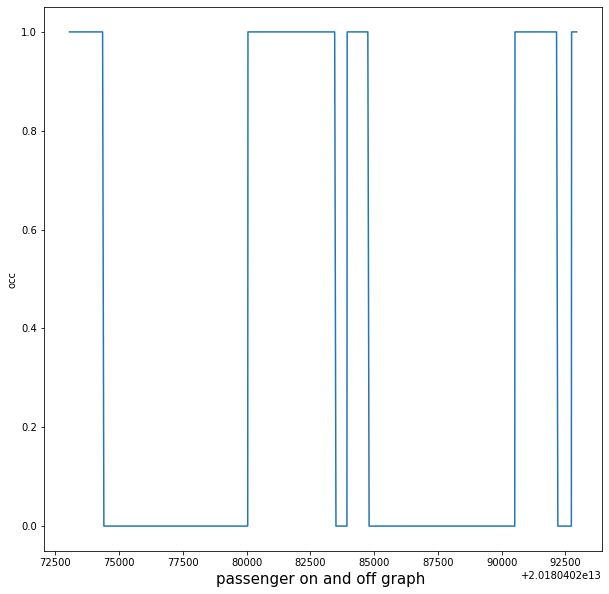

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x="time", y="occ", data=taxi)
plt.xlabel('passenger on and off graph ', fontsize=15)
plt.show()


In [101]:
taxi_np = taxi.values
print(taxi_np.shape)

"""
 -1: event of 0 to 1 (i.e., passenger on)
 +1: event of 1 to 0 (i.e., passenger off)
"""
EVENT_OFF_TO_ON = -1
EVENT_ON_TO_OFF = 1

taxi_np_diff = taxi_np[1:, -1] - taxi_np[:-1, -1]

print(np.count_nonzero(taxi_np_diff == EVENT_OFF_TO_ON), "passengers took the taxi ID", taxi_id)
print(np.count_nonzero(taxi_np_diff == EVENT_ON_TO_OFF), "passengers got off the taxi ID", taxi_id)


(705, 8)
4 passengers took the taxi ID 180111878
4 passengers got off the taxi ID 180111878


In [122]:
EVENT_OFF_TO_ON = -1
EVENT_ON_TO_OFF = 1

taxi_id_dict = taxi_grouped.groups

for for_idx, taxi_id in enumerate(taxi_id_dict):
    taxi = taxi_grouped.get_group(taxi_id)
    taxi = taxi.sort_values(["time"], ascending=[True])
    taxi = taxi.reset_index(drop=True)

    taxi_np = taxi.values
    taxi_np_diff = taxi_np[1:, -1] - taxi_np[:-1, -1]
    print(for_idx, np.count_nonzero(taxi_np_diff == EVENT_OFF_TO_ON), "passengers took the taxi ID", taxi_id)



0 0 passengers took the taxi ID 180000525
1 4 passengers took the taxi ID 180000826
2 4 passengers took the taxi ID 180002092
3 0 passengers took the taxi ID 180002578
4 4 passengers took the taxi ID 180003216
5 5 passengers took the taxi ID 180100817
6 4 passengers took the taxi ID 180103394
7 6 passengers took the taxi ID 180104894
8 0 passengers took the taxi ID 180105156
9 1 passengers took the taxi ID 180105334
10 4 passengers took the taxi ID 180105720
11 7 passengers took the taxi ID 180106437
12 1 passengers took the taxi ID 180106932
13 3 passengers took the taxi ID 180106955
14 2 passengers took the taxi ID 180106961
15 8 passengers took the taxi ID 180107104
16 4 passengers took the taxi ID 180107721
17 3 passengers took the taxi ID 180109496
18 0 passengers took the taxi ID 180109650
19 6 passengers took the taxi ID 180109673
20 0 passengers took the taxi ID 180110743
21 1 passengers took the taxi ID 180110780
22 1 passengers took the taxi ID 180111612
23 4 passengers took 

395 4 passengers took the taxi ID 180700322
396 2 passengers took the taxi ID 180700324
397 4 passengers took the taxi ID 180700325
398 9 passengers took the taxi ID 180700331
399 1 passengers took the taxi ID 180700332
400 0 passengers took the taxi ID 180700333
401 3 passengers took the taxi ID 180700338
402 0 passengers took the taxi ID 180700340
403 2 passengers took the taxi ID 180700341
404 5 passengers took the taxi ID 180700344
405 4 passengers took the taxi ID 180700346
406 1 passengers took the taxi ID 180700351
407 4 passengers took the taxi ID 180700353
408 0 passengers took the taxi ID 180700354
409 6 passengers took the taxi ID 180700357
410 0 passengers took the taxi ID 180700358
411 3 passengers took the taxi ID 180700359
412 0 passengers took the taxi ID 180700361
413 2 passengers took the taxi ID 180700362
414 0 passengers took the taxi ID 180700364
415 2 passengers took the taxi ID 180700370
416 1 passengers took the taxi ID 180700374
417 4 passengers took the taxi I

616 5 passengers took the taxi ID 180700923
617 0 passengers took the taxi ID 180700924
618 0 passengers took the taxi ID 180700925
619 4 passengers took the taxi ID 180700928
620 5 passengers took the taxi ID 180700932
621 5 passengers took the taxi ID 180700933
622 6 passengers took the taxi ID 180700937
623 0 passengers took the taxi ID 180700939
624 4 passengers took the taxi ID 180700940
625 0 passengers took the taxi ID 180700941
626 4 passengers took the taxi ID 180700943
627 4 passengers took the taxi ID 180700944
628 5 passengers took the taxi ID 180700947
629 3 passengers took the taxi ID 180700948
630 5 passengers took the taxi ID 180700949
631 1 passengers took the taxi ID 180700950
632 7 passengers took the taxi ID 180700951
633 5 passengers took the taxi ID 180700952
634 0 passengers took the taxi ID 180700956
635 7 passengers took the taxi ID 180700957
636 5 passengers took the taxi ID 180700959
637 3 passengers took the taxi ID 180700963
638 0 passengers took the taxi I

827 6 passengers took the taxi ID 180701363
828 5 passengers took the taxi ID 180701366
829 3 passengers took the taxi ID 180701367
830 9 passengers took the taxi ID 180701372
831 7 passengers took the taxi ID 180701378
832 3 passengers took the taxi ID 180701382
833 7 passengers took the taxi ID 180701383
834 0 passengers took the taxi ID 180701384
835 1 passengers took the taxi ID 180701385
836 0 passengers took the taxi ID 180701389
837 0 passengers took the taxi ID 180701392
838 4 passengers took the taxi ID 180701396
839 0 passengers took the taxi ID 180701397
840 4 passengers took the taxi ID 180701401
841 3 passengers took the taxi ID 180701403
842 1 passengers took the taxi ID 180701405
843 4 passengers took the taxi ID 180701406
844 5 passengers took the taxi ID 180701407
845 7 passengers took the taxi ID 180701410
846 0 passengers took the taxi ID 180701414
847 4 passengers took the taxi ID 180701416
848 5 passengers took the taxi ID 180701418
849 6 passengers took the taxi I

1050 4 passengers took the taxi ID 180701835
1051 6 passengers took the taxi ID 180701836
1052 5 passengers took the taxi ID 180701837
1053 10 passengers took the taxi ID 180701838
1054 0 passengers took the taxi ID 180701839
1055 5 passengers took the taxi ID 180701840
1056 5 passengers took the taxi ID 180701844
1057 1 passengers took the taxi ID 180701847
1058 0 passengers took the taxi ID 180701848
1059 3 passengers took the taxi ID 180701851
1060 2 passengers took the taxi ID 180701853
1061 0 passengers took the taxi ID 180701854
1062 0 passengers took the taxi ID 180701855
1063 6 passengers took the taxi ID 180701856
1064 7 passengers took the taxi ID 180701857
1065 7 passengers took the taxi ID 180701858
1066 4 passengers took the taxi ID 180701864
1067 1 passengers took the taxi ID 180701869
1068 6 passengers took the taxi ID 180701872
1069 6 passengers took the taxi ID 180701874
1070 5 passengers took the taxi ID 180701877
1071 7 passengers took the taxi ID 180701880
1072 0 pa

1421 4 passengers took the taxi ID 180702572
1422 4 passengers took the taxi ID 180702574
1423 4 passengers took the taxi ID 180702575
1424 0 passengers took the taxi ID 180702576
1425 3 passengers took the taxi ID 180702578
1426 0 passengers took the taxi ID 180702585
1427 5 passengers took the taxi ID 180702586
1428 2 passengers took the taxi ID 180702588
1429 9 passengers took the taxi ID 180702589
1430 0 passengers took the taxi ID 180702591
1431 4 passengers took the taxi ID 180702595
1432 3 passengers took the taxi ID 180702599
1433 9 passengers took the taxi ID 180702600
1434 5 passengers took the taxi ID 180702601
1435 2 passengers took the taxi ID 180702602
1436 3 passengers took the taxi ID 180702603
1437 2 passengers took the taxi ID 180702604
1438 8 passengers took the taxi ID 180702606
1439 4 passengers took the taxi ID 180702607
1440 8 passengers took the taxi ID 180702608
1441 7 passengers took the taxi ID 180702609
1442 7 passengers took the taxi ID 180702611
1443 3 pas

1608 5 passengers took the taxi ID 180703010
1609 3 passengers took the taxi ID 180703011
1610 0 passengers took the taxi ID 180703012
1611 0 passengers took the taxi ID 180703014
1612 4 passengers took the taxi ID 180703016
1613 0 passengers took the taxi ID 180703017
1614 0 passengers took the taxi ID 180703018
1615 0 passengers took the taxi ID 180703023
1616 5 passengers took the taxi ID 180703024
1617 0 passengers took the taxi ID 180703027
1618 0 passengers took the taxi ID 180703028
1619 5 passengers took the taxi ID 180703033
1620 6 passengers took the taxi ID 180703034
1621 0 passengers took the taxi ID 180703035
1622 10 passengers took the taxi ID 180703036
1623 6 passengers took the taxi ID 180703038
1624 4 passengers took the taxi ID 180703040
1625 6 passengers took the taxi ID 180703043
1626 5 passengers took the taxi ID 180703045
1627 7 passengers took the taxi ID 180703047
1628 6 passengers took the taxi ID 180703054
1629 1 passengers took the taxi ID 180703058
1630 0 pa

1826 6 passengers took the taxi ID 180703536
1827 0 passengers took the taxi ID 180703537
1828 6 passengers took the taxi ID 180703540
1829 3 passengers took the taxi ID 180703544
1830 5 passengers took the taxi ID 180703548
1831 1 passengers took the taxi ID 180703549
1832 4 passengers took the taxi ID 180703550
1833 1 passengers took the taxi ID 180703553
1834 1 passengers took the taxi ID 180703554
1835 0 passengers took the taxi ID 180703556
1836 10 passengers took the taxi ID 180703559
1837 7 passengers took the taxi ID 180703560
1838 1 passengers took the taxi ID 180703561
1839 4 passengers took the taxi ID 180703563
1840 0 passengers took the taxi ID 180703565
1841 0 passengers took the taxi ID 180703566
1842 3 passengers took the taxi ID 180703569
1843 2 passengers took the taxi ID 180703571
1844 1 passengers took the taxi ID 180703572
1845 4 passengers took the taxi ID 180703574
1846 1 passengers took the taxi ID 180703575
1847 3 passengers took the taxi ID 180703578
1848 6 pa

2207 6 passengers took the taxi ID 180704375
2208 5 passengers took the taxi ID 180704378
2209 2 passengers took the taxi ID 180704379
2210 0 passengers took the taxi ID 180704380
2211 5 passengers took the taxi ID 180704381
2212 7 passengers took the taxi ID 180704384
2213 1 passengers took the taxi ID 180704386
2214 3 passengers took the taxi ID 180704389
2215 5 passengers took the taxi ID 180704392
2216 4 passengers took the taxi ID 180704393
2217 4 passengers took the taxi ID 180704395
2218 8 passengers took the taxi ID 180704397
2219 3 passengers took the taxi ID 180704400
2220 8 passengers took the taxi ID 180704402
2221 1 passengers took the taxi ID 180704405
2222 3 passengers took the taxi ID 180704407
2223 1 passengers took the taxi ID 180704408
2224 0 passengers took the taxi ID 180704409
2225 7 passengers took the taxi ID 180704410
2226 7 passengers took the taxi ID 180704411
2227 4 passengers took the taxi ID 180704415
2228 7 passengers took the taxi ID 180704418
2229 7 pas

2414 6 passengers took the taxi ID 180704820
2415 0 passengers took the taxi ID 180704822
2416 6 passengers took the taxi ID 180704825
2417 0 passengers took the taxi ID 180704826
2418 6 passengers took the taxi ID 180704827
2419 7 passengers took the taxi ID 180704834
2420 5 passengers took the taxi ID 180704836
2421 5 passengers took the taxi ID 180704838
2422 6 passengers took the taxi ID 180704840
2423 4 passengers took the taxi ID 180704843
2424 2 passengers took the taxi ID 180704845
2425 0 passengers took the taxi ID 180704846
2426 0 passengers took the taxi ID 180704848
2427 4 passengers took the taxi ID 180704849
2428 6 passengers took the taxi ID 180704850
2429 8 passengers took the taxi ID 180704855
2430 2 passengers took the taxi ID 180704857
2431 3 passengers took the taxi ID 180704858
2432 5 passengers took the taxi ID 180704859
2433 4 passengers took the taxi ID 180704861
2434 5 passengers took the taxi ID 180704862
2435 2 passengers took the taxi ID 180704864
2436 6 pas

2625 3 passengers took the taxi ID 180705278
2626 6 passengers took the taxi ID 180705279
2627 2 passengers took the taxi ID 180705283
2628 8 passengers took the taxi ID 180705287
2629 6 passengers took the taxi ID 180705288
2630 6 passengers took the taxi ID 180705291
2631 6 passengers took the taxi ID 180705292
2632 0 passengers took the taxi ID 180705295
2633 2 passengers took the taxi ID 180705296
2634 9 passengers took the taxi ID 180705302
2635 0 passengers took the taxi ID 180705304
2636 0 passengers took the taxi ID 180705306
2637 10 passengers took the taxi ID 180705307
2638 2 passengers took the taxi ID 180705308
2639 0 passengers took the taxi ID 180705309
2640 7 passengers took the taxi ID 180705310
2641 4 passengers took the taxi ID 180705311
2642 4 passengers took the taxi ID 180705312
2643 6 passengers took the taxi ID 180705313
2644 3 passengers took the taxi ID 180705314
2645 0 passengers took the taxi ID 180705315
2646 6 passengers took the taxi ID 180705316
2647 4 pa

2838 5 passengers took the taxi ID 180705697
2839 3 passengers took the taxi ID 180705702
2840 4 passengers took the taxi ID 180705703
2841 2 passengers took the taxi ID 180705705
2842 0 passengers took the taxi ID 180705706
2843 6 passengers took the taxi ID 180705707
2844 7 passengers took the taxi ID 180705708
2845 9 passengers took the taxi ID 180705709
2846 3 passengers took the taxi ID 180705710
2847 1 passengers took the taxi ID 180705713
2848 2 passengers took the taxi ID 180705716
2849 3 passengers took the taxi ID 180705719
2850 0 passengers took the taxi ID 180705721
2851 3 passengers took the taxi ID 180705723
2852 5 passengers took the taxi ID 180705728
2853 4 passengers took the taxi ID 180705732
2854 4 passengers took the taxi ID 180705734
2855 4 passengers took the taxi ID 180705737
2856 7 passengers took the taxi ID 180705741
2857 4 passengers took the taxi ID 180705743
2858 3 passengers took the taxi ID 180705746
2859 4 passengers took the taxi ID 180705747
2860 6 pas

3047 4 passengers took the taxi ID 180706150
3048 2 passengers took the taxi ID 180706154
3049 6 passengers took the taxi ID 180706157
3050 2 passengers took the taxi ID 180706158
3051 5 passengers took the taxi ID 180706160
3052 1 passengers took the taxi ID 180706163
3053 0 passengers took the taxi ID 180706165
3054 4 passengers took the taxi ID 180706167
3055 5 passengers took the taxi ID 180706168
3056 6 passengers took the taxi ID 180706172
3057 0 passengers took the taxi ID 180706173
3058 0 passengers took the taxi ID 180706178
3059 4 passengers took the taxi ID 180706179
3060 5 passengers took the taxi ID 180706181
3061 3 passengers took the taxi ID 180706182
3062 5 passengers took the taxi ID 180706183
3063 4 passengers took the taxi ID 180706184
3064 0 passengers took the taxi ID 180706191
3065 4 passengers took the taxi ID 180706193
3066 0 passengers took the taxi ID 180706194
3067 5 passengers took the taxi ID 180706196
3068 0 passengers took the taxi ID 180706197
3069 2 pas

3254 2 passengers took the taxi ID 180706538
3255 4 passengers took the taxi ID 180706542
3256 0 passengers took the taxi ID 180706544
3257 4 passengers took the taxi ID 180706545
3258 5 passengers took the taxi ID 180706547
3259 7 passengers took the taxi ID 180706548
3260 6 passengers took the taxi ID 180706551
3261 0 passengers took the taxi ID 180706553
3262 0 passengers took the taxi ID 180706555
3263 2 passengers took the taxi ID 180706556
3264 5 passengers took the taxi ID 180706558
3265 0 passengers took the taxi ID 180706561
3266 4 passengers took the taxi ID 180706564
3267 3 passengers took the taxi ID 180706566
3268 5 passengers took the taxi ID 180706567
3269 0 passengers took the taxi ID 180706568
3270 3 passengers took the taxi ID 180706572
3271 8 passengers took the taxi ID 180706573
3272 2 passengers took the taxi ID 180706574
3273 4 passengers took the taxi ID 180706575
3274 8 passengers took the taxi ID 180706576
3275 0 passengers took the taxi ID 180706578
3276 1 pas

3462 7 passengers took the taxi ID 180706932
3463 2 passengers took the taxi ID 180706933
3464 6 passengers took the taxi ID 180706936
3465 9 passengers took the taxi ID 180706937
3466 3 passengers took the taxi ID 180706939
3467 7 passengers took the taxi ID 180706940
3468 4 passengers took the taxi ID 180706942
3469 2 passengers took the taxi ID 180706944
3470 3 passengers took the taxi ID 180706946
3471 4 passengers took the taxi ID 180706952
3472 7 passengers took the taxi ID 180706953
3473 4 passengers took the taxi ID 180706954
3474 7 passengers took the taxi ID 180706955
3475 5 passengers took the taxi ID 180706956
3476 4 passengers took the taxi ID 180706958
3477 5 passengers took the taxi ID 180706959
3478 3 passengers took the taxi ID 180706962
3479 4 passengers took the taxi ID 180706963
3480 5 passengers took the taxi ID 180706964
3481 3 passengers took the taxi ID 180706966
3482 4 passengers took the taxi ID 180706969
3483 1 passengers took the taxi ID 180706970
3484 5 pas

3822 1 passengers took the taxi ID 180707609
3823 1 passengers took the taxi ID 180707610
3824 0 passengers took the taxi ID 180707611
3825 1 passengers took the taxi ID 180707612
3826 0 passengers took the taxi ID 180707613
3827 0 passengers took the taxi ID 180707614
3828 0 passengers took the taxi ID 180707616
3829 8 passengers took the taxi ID 180707618
3830 3 passengers took the taxi ID 180707619
3831 3 passengers took the taxi ID 180707620
3832 2 passengers took the taxi ID 180707622
3833 4 passengers took the taxi ID 180707627
3834 6 passengers took the taxi ID 180707629
3835 4 passengers took the taxi ID 180707630
3836 4 passengers took the taxi ID 180707631
3837 0 passengers took the taxi ID 180707632
3838 4 passengers took the taxi ID 180707638
3839 5 passengers took the taxi ID 180707639
3840 1 passengers took the taxi ID 180707645
3841 5 passengers took the taxi ID 180707648
3842 3 passengers took the taxi ID 180707649
3843 4 passengers took the taxi ID 180707650
3844 0 pas

4028 5 passengers took the taxi ID 180707983
4029 4 passengers took the taxi ID 180707984
4030 5 passengers took the taxi ID 180707986
4031 4 passengers took the taxi ID 180707987
4032 5 passengers took the taxi ID 180707989
4033 7 passengers took the taxi ID 180707991
4034 4 passengers took the taxi ID 180707992
4035 6 passengers took the taxi ID 180707995
4036 5 passengers took the taxi ID 180707996
4037 0 passengers took the taxi ID 180707997
4038 4 passengers took the taxi ID 180707998
4039 1 passengers took the taxi ID 180707999
4040 3 passengers took the taxi ID 180708000
4041 0 passengers took the taxi ID 180708004
4042 5 passengers took the taxi ID 180708006
4043 5 passengers took the taxi ID 180708013
4044 7 passengers took the taxi ID 180708015
4045 5 passengers took the taxi ID 180708017
4046 5 passengers took the taxi ID 180708020
4047 3 passengers took the taxi ID 180708025
4048 5 passengers took the taxi ID 180708026
4049 5 passengers took the taxi ID 180708027
4050 4 pas

4236 8 passengers took the taxi ID 180708372
4237 5 passengers took the taxi ID 180708376
4238 3 passengers took the taxi ID 180708377
4239 5 passengers took the taxi ID 180708378
4240 6 passengers took the taxi ID 180708379
4241 4 passengers took the taxi ID 180708381
4242 0 passengers took the taxi ID 180708382
4243 5 passengers took the taxi ID 180708383
4244 0 passengers took the taxi ID 180708388
4245 5 passengers took the taxi ID 180708389
4246 3 passengers took the taxi ID 180708392
4247 2 passengers took the taxi ID 180708393
4248 6 passengers took the taxi ID 180708395
4249 5 passengers took the taxi ID 180708397
4250 6 passengers took the taxi ID 180708398
4251 3 passengers took the taxi ID 180708400
4252 2 passengers took the taxi ID 180708401
4253 3 passengers took the taxi ID 180708402
4254 5 passengers took the taxi ID 180708404
4255 4 passengers took the taxi ID 180708406
4256 2 passengers took the taxi ID 180708407
4257 0 passengers took the taxi ID 180708409
4258 3 pas

4424 7 passengers took the taxi ID 180708708
4425 5 passengers took the taxi ID 180708715
4426 0 passengers took the taxi ID 180708716
4427 6 passengers took the taxi ID 180708717
4428 0 passengers took the taxi ID 180708718
4429 0 passengers took the taxi ID 180708723
4430 5 passengers took the taxi ID 180708724
4431 3 passengers took the taxi ID 180708727
4432 6 passengers took the taxi ID 180708729
4433 6 passengers took the taxi ID 180708732
4434 6 passengers took the taxi ID 180708735
4435 1 passengers took the taxi ID 180708738
4436 5 passengers took the taxi ID 180708741
4437 8 passengers took the taxi ID 180708743
4438 4 passengers took the taxi ID 180708744
4439 8 passengers took the taxi ID 180708747
4440 6 passengers took the taxi ID 180708748
4441 4 passengers took the taxi ID 180708750
4442 6 passengers took the taxi ID 180708751
4443 5 passengers took the taxi ID 180708752
4444 2 passengers took the taxi ID 180708754
4445 4 passengers took the taxi ID 180708756
4446 0 pas

4623 3 passengers took the taxi ID 180709077
4624 3 passengers took the taxi ID 180709080
4625 2 passengers took the taxi ID 180709083
4626 5 passengers took the taxi ID 180709084
4627 7 passengers took the taxi ID 180709086
4628 5 passengers took the taxi ID 180709087
4629 6 passengers took the taxi ID 180709092
4630 1 passengers took the taxi ID 180709093
4631 0 passengers took the taxi ID 180709094
4632 1 passengers took the taxi ID 180709096
4633 2 passengers took the taxi ID 180709097
4634 0 passengers took the taxi ID 180709098
4635 4 passengers took the taxi ID 180709101
4636 2 passengers took the taxi ID 180709103
4637 1 passengers took the taxi ID 180709107
4638 4 passengers took the taxi ID 180709110
4639 7 passengers took the taxi ID 180709361
4640 4 passengers took the taxi ID 180709364
4641 2 passengers took the taxi ID 180709368
4642 6 passengers took the taxi ID 180709369
4643 2 passengers took the taxi ID 180709371
4644 2 passengers took the taxi ID 180709373
4645 2 pas

4840 6 passengers took the taxi ID 180709829
4841 3 passengers took the taxi ID 180709830
4842 1 passengers took the taxi ID 180709832
4843 6 passengers took the taxi ID 180709833
4844 5 passengers took the taxi ID 180709834
4845 3 passengers took the taxi ID 180709845
4846 7 passengers took the taxi ID 180709846
4847 2 passengers took the taxi ID 180709848
4848 0 passengers took the taxi ID 180709849
4849 7 passengers took the taxi ID 180709853
4850 0 passengers took the taxi ID 180709854
4851 4 passengers took the taxi ID 180709858
4852 5 passengers took the taxi ID 180709859
4853 4 passengers took the taxi ID 180709861
4854 1 passengers took the taxi ID 180709869
4855 7 passengers took the taxi ID 180709873
4856 4 passengers took the taxi ID 180709881
4857 4 passengers took the taxi ID 180709885
4858 9 passengers took the taxi ID 180709886
4859 0 passengers took the taxi ID 180709895
4860 4 passengers took the taxi ID 180709896
4861 6 passengers took the taxi ID 180709898
4862 3 pas

5025 9 passengers took the taxi ID 180710274
5026 3 passengers took the taxi ID 180710275
5027 7 passengers took the taxi ID 180710281
5028 1 passengers took the taxi ID 180710283
5029 1 passengers took the taxi ID 180710284
5030 6 passengers took the taxi ID 180710286
5031 3 passengers took the taxi ID 180710287
5032 0 passengers took the taxi ID 180710289
5033 1 passengers took the taxi ID 180710290
5034 4 passengers took the taxi ID 180710293
5035 1 passengers took the taxi ID 180710294
5036 4 passengers took the taxi ID 180710296
5037 7 passengers took the taxi ID 180710299
5038 4 passengers took the taxi ID 180710301
5039 2 passengers took the taxi ID 180710305
5040 3 passengers took the taxi ID 180710306
5041 4 passengers took the taxi ID 180710307
5042 0 passengers took the taxi ID 180710308
5043 0 passengers took the taxi ID 180710311
5044 0 passengers took the taxi ID 180710312
5045 3 passengers took the taxi ID 180710313
5046 3 passengers took the taxi ID 180710317
5047 0 pas

5240 0 passengers took the taxi ID 180710759
5241 5 passengers took the taxi ID 180710760
5242 9 passengers took the taxi ID 180710761
5243 7 passengers took the taxi ID 180710763
5244 4 passengers took the taxi ID 180710764
5245 6 passengers took the taxi ID 180710767
5246 3 passengers took the taxi ID 180710768
5247 5 passengers took the taxi ID 180710769
5248 4 passengers took the taxi ID 180710771
5249 4 passengers took the taxi ID 180710772
5250 8 passengers took the taxi ID 180710773
5251 1 passengers took the taxi ID 180710774
5252 7 passengers took the taxi ID 180710778
5253 6 passengers took the taxi ID 180710779
5254 7 passengers took the taxi ID 180710784
5255 5 passengers took the taxi ID 180710786
5256 6 passengers took the taxi ID 180710787
5257 3 passengers took the taxi ID 180710789
5258 1 passengers took the taxi ID 180710792
5259 3 passengers took the taxi ID 180710793
5260 5 passengers took the taxi ID 180710804
5261 0 passengers took the taxi ID 180710809
5262 3 pas

5461 4 passengers took the taxi ID 180711500
5462 0 passengers took the taxi ID 180711502
5463 5 passengers took the taxi ID 180711504
5464 0 passengers took the taxi ID 180711506
5465 6 passengers took the taxi ID 180711508
5466 5 passengers took the taxi ID 180711509
5467 2 passengers took the taxi ID 180711511
5468 2 passengers took the taxi ID 180711512
5469 4 passengers took the taxi ID 180711513
5470 10 passengers took the taxi ID 180711518
5471 0 passengers took the taxi ID 180711520
5472 0 passengers took the taxi ID 180711529
5473 5 passengers took the taxi ID 180711531
5474 7 passengers took the taxi ID 180711532
5475 0 passengers took the taxi ID 180711536
5476 7 passengers took the taxi ID 180711539
5477 5 passengers took the taxi ID 180711541
5478 4 passengers took the taxi ID 180711543
5479 7 passengers took the taxi ID 180711544
5480 2 passengers took the taxi ID 180711550
5481 5 passengers took the taxi ID 180711551
5482 5 passengers took the taxi ID 180711552
5483 4 pa

5679 1 passengers took the taxi ID 180711962
5680 10 passengers took the taxi ID 180711963
5681 1 passengers took the taxi ID 180711967
5682 3 passengers took the taxi ID 180711968
5683 1 passengers took the taxi ID 180711972
5684 3 passengers took the taxi ID 180711975
5685 4 passengers took the taxi ID 180711976
5686 1 passengers took the taxi ID 180711981
5687 4 passengers took the taxi ID 180711988
5688 3 passengers took the taxi ID 180711992
5689 2 passengers took the taxi ID 180711993
5690 4 passengers took the taxi ID 180711995
5691 8 passengers took the taxi ID 180711997
5692 1 passengers took the taxi ID 180711998
5693 0 passengers took the taxi ID 180711999
5694 3 passengers took the taxi ID 180712002
5695 2 passengers took the taxi ID 180712004
5696 2 passengers took the taxi ID 180712005
5697 9 passengers took the taxi ID 180712006
5698 4 passengers took the taxi ID 180712007
5699 7 passengers took the taxi ID 180712008
5700 5 passengers took the taxi ID 180712011
5701 1 pa

5908 5 passengers took the taxi ID 180712505
5909 2 passengers took the taxi ID 180712508
5910 2 passengers took the taxi ID 180712509
5911 2 passengers took the taxi ID 180712511
5912 0 passengers took the taxi ID 180712512
5913 1 passengers took the taxi ID 180712513
5914 1 passengers took the taxi ID 180712514
5915 3 passengers took the taxi ID 180712516
5916 0 passengers took the taxi ID 180712517
5917 1 passengers took the taxi ID 180712526
5918 0 passengers took the taxi ID 180712527
5919 1 passengers took the taxi ID 180712531
5920 3 passengers took the taxi ID 180712532
5921 2 passengers took the taxi ID 180712533
5922 7 passengers took the taxi ID 180712540
5923 3 passengers took the taxi ID 180712541
5924 4 passengers took the taxi ID 180712542
5925 2 passengers took the taxi ID 180712544
5926 0 passengers took the taxi ID 180712546
5927 6 passengers took the taxi ID 180712548
5928 0 passengers took the taxi ID 180712556
5929 0 passengers took the taxi ID 180712557
5930 7 pas

6111 4 passengers took the taxi ID 180712904
6112 6 passengers took the taxi ID 180712905
6113 3 passengers took the taxi ID 180712906
6114 5 passengers took the taxi ID 180712907
6115 0 passengers took the taxi ID 180712908
6116 3 passengers took the taxi ID 180712909
6117 0 passengers took the taxi ID 180712912
6118 2 passengers took the taxi ID 180712917
6119 3 passengers took the taxi ID 180712921
6120 4 passengers took the taxi ID 180712927
6121 0 passengers took the taxi ID 180712929
6122 1 passengers took the taxi ID 180712932
6123 7 passengers took the taxi ID 180712933
6124 0 passengers took the taxi ID 180712935
6125 2 passengers took the taxi ID 180712937
6126 0 passengers took the taxi ID 180712942
6127 0 passengers took the taxi ID 180712947
6128 7 passengers took the taxi ID 180712948
6129 10 passengers took the taxi ID 180712949
6130 1 passengers took the taxi ID 180712951
6131 2 passengers took the taxi ID 180712952
6132 0 passengers took the taxi ID 180712955
6133 6 pa

6337 4 passengers took the taxi ID 180713558
6338 5 passengers took the taxi ID 180713559
6339 4 passengers took the taxi ID 180713563
6340 6 passengers took the taxi ID 180713574
6341 3 passengers took the taxi ID 180713575
6342 1 passengers took the taxi ID 180713578
6343 4 passengers took the taxi ID 180713580
6344 2 passengers took the taxi ID 180713581
6345 5 passengers took the taxi ID 180713582
6346 3 passengers took the taxi ID 180713588
6347 0 passengers took the taxi ID 180713590
6348 1 passengers took the taxi ID 180713593
6349 3 passengers took the taxi ID 180713594
6350 4 passengers took the taxi ID 180713595
6351 4 passengers took the taxi ID 180713596
6352 1 passengers took the taxi ID 180713601
6353 6 passengers took the taxi ID 180713603
6354 3 passengers took the taxi ID 180713606
6355 3 passengers took the taxi ID 180713607
6356 3 passengers took the taxi ID 180713608
6357 2 passengers took the taxi ID 180713609
6358 2 passengers took the taxi ID 180713610
6359 2 pas

6563 3 passengers took the taxi ID 180714071
6564 3 passengers took the taxi ID 180714073
6565 5 passengers took the taxi ID 180714075
6566 2 passengers took the taxi ID 180714080
6567 7 passengers took the taxi ID 180714081
6568 0 passengers took the taxi ID 180714082
6569 5 passengers took the taxi ID 180714083
6570 4 passengers took the taxi ID 180714085
6571 0 passengers took the taxi ID 180714088
6572 0 passengers took the taxi ID 180714090
6573 4 passengers took the taxi ID 180714091
6574 4 passengers took the taxi ID 180714093
6575 3 passengers took the taxi ID 180714094
6576 4 passengers took the taxi ID 180714096
6577 4 passengers took the taxi ID 180714098
6578 7 passengers took the taxi ID 180714099
6579 0 passengers took the taxi ID 180714100
6580 6 passengers took the taxi ID 180714101
6581 4 passengers took the taxi ID 180714102
6582 2 passengers took the taxi ID 180714104
6583 5 passengers took the taxi ID 180714107
6584 4 passengers took the taxi ID 180714112
6585 0 pas

6785 1 passengers took the taxi ID 180714530
6786 1 passengers took the taxi ID 180714531
6787 7 passengers took the taxi ID 180714532
6788 0 passengers took the taxi ID 180714534
6789 0 passengers took the taxi ID 180714553
6790 5 passengers took the taxi ID 180714555
6791 3 passengers took the taxi ID 180714556
6792 2 passengers took the taxi ID 180714561
6793 4 passengers took the taxi ID 180714562
6794 5 passengers took the taxi ID 180714564
6795 2 passengers took the taxi ID 180714568
6796 0 passengers took the taxi ID 180714569
6797 2 passengers took the taxi ID 180714570
6798 1 passengers took the taxi ID 180714571
6799 0 passengers took the taxi ID 180714575
6800 3 passengers took the taxi ID 180714577
6801 6 passengers took the taxi ID 180714579
6802 6 passengers took the taxi ID 180714580
6803 4 passengers took the taxi ID 180714583
6804 0 passengers took the taxi ID 180714584
6805 1 passengers took the taxi ID 180714585
6806 3 passengers took the taxi ID 180714586
6807 7 pas

7015 0 passengers took the taxi ID 180715008
7016 0 passengers took the taxi ID 180715011
7017 9 passengers took the taxi ID 180715018
7018 5 passengers took the taxi ID 180715021
7019 4 passengers took the taxi ID 180715025
7020 4 passengers took the taxi ID 180715026
7021 1 passengers took the taxi ID 180715028
7022 3 passengers took the taxi ID 180715030
7023 6 passengers took the taxi ID 180715032
7024 5 passengers took the taxi ID 180715033
7025 6 passengers took the taxi ID 180715036
7026 0 passengers took the taxi ID 180715038
7027 0 passengers took the taxi ID 180715041
7028 0 passengers took the taxi ID 180715042
7029 3 passengers took the taxi ID 180715043
7030 0 passengers took the taxi ID 180715044
7031 4 passengers took the taxi ID 180715045
7032 1 passengers took the taxi ID 180715046
7033 6 passengers took the taxi ID 180715049
7034 6 passengers took the taxi ID 180715050
7035 5 passengers took the taxi ID 180715052
7036 0 passengers took the taxi ID 180715054
7037 7 pas

7217 7 passengers took the taxi ID 180715459
7218 4 passengers took the taxi ID 180715460
7219 8 passengers took the taxi ID 180715461
7220 5 passengers took the taxi ID 180715463
7221 2 passengers took the taxi ID 180715465
7222 4 passengers took the taxi ID 180715467
7223 3 passengers took the taxi ID 180715469
7224 6 passengers took the taxi ID 180715470
7225 4 passengers took the taxi ID 180715471
7226 0 passengers took the taxi ID 180715473
7227 0 passengers took the taxi ID 180715474
7228 1 passengers took the taxi ID 180715476
7229 5 passengers took the taxi ID 180715477
7230 3 passengers took the taxi ID 180715479
7231 0 passengers took the taxi ID 180715482
7232 0 passengers took the taxi ID 180715483
7233 3 passengers took the taxi ID 180715486
7234 0 passengers took the taxi ID 180715489
7235 3 passengers took the taxi ID 180715490
7236 5 passengers took the taxi ID 180715491
7237 3 passengers took the taxi ID 180715492
7238 5 passengers took the taxi ID 180715493
7239 0 pas

7417 0 passengers took the taxi ID 180715824
7418 4 passengers took the taxi ID 180715825
7419 6 passengers took the taxi ID 180715826
7420 0 passengers took the taxi ID 180715827
7421 5 passengers took the taxi ID 180715828
7422 0 passengers took the taxi ID 180715829
7423 5 passengers took the taxi ID 180715830
7424 2 passengers took the taxi ID 180715832
7425 4 passengers took the taxi ID 180715833
7426 2 passengers took the taxi ID 180715834
7427 6 passengers took the taxi ID 180715836
7428 4 passengers took the taxi ID 180715837
7429 4 passengers took the taxi ID 180715839
7430 4 passengers took the taxi ID 180715841
7431 3 passengers took the taxi ID 180715847
7432 2 passengers took the taxi ID 180715848
7433 5 passengers took the taxi ID 180715849
7434 9 passengers took the taxi ID 180715854
7435 7 passengers took the taxi ID 180715855
7436 4 passengers took the taxi ID 180715857
7437 1 passengers took the taxi ID 180715859
7438 0 passengers took the taxi ID 180715865
7439 2 pas

7633 5 passengers took the taxi ID 180716296
7634 0 passengers took the taxi ID 180716298
7635 3 passengers took the taxi ID 180716299
7636 0 passengers took the taxi ID 180716300
7637 0 passengers took the taxi ID 180716302
7638 1 passengers took the taxi ID 180716304
7639 5 passengers took the taxi ID 180716308
7640 3 passengers took the taxi ID 180716311
7641 0 passengers took the taxi ID 180716313
7642 6 passengers took the taxi ID 180716318
7643 0 passengers took the taxi ID 180716321
7644 5 passengers took the taxi ID 180716323
7645 3 passengers took the taxi ID 180716325
7646 4 passengers took the taxi ID 180716328
7647 6 passengers took the taxi ID 180716330
7648 0 passengers took the taxi ID 180716331
7649 5 passengers took the taxi ID 180716337
7650 2 passengers took the taxi ID 180716338
7651 4 passengers took the taxi ID 180716339
7652 0 passengers took the taxi ID 180716340
7653 6 passengers took the taxi ID 180716341
7654 2 passengers took the taxi ID 180716342
7655 5 pas

7857 3 passengers took the taxi ID 180716992
7858 6 passengers took the taxi ID 180716993
7859 2 passengers took the taxi ID 180716994
7860 1 passengers took the taxi ID 180716996
7861 4 passengers took the taxi ID 180716997
7862 7 passengers took the taxi ID 180716999
7863 0 passengers took the taxi ID 180717001
7864 5 passengers took the taxi ID 180717003
7865 2 passengers took the taxi ID 180717005
7866 0 passengers took the taxi ID 180717006
7867 7 passengers took the taxi ID 180717007
7868 5 passengers took the taxi ID 180717008
7869 1 passengers took the taxi ID 180717009
7870 7 passengers took the taxi ID 180717010
7871 4 passengers took the taxi ID 180717011
7872 4 passengers took the taxi ID 180717013
7873 4 passengers took the taxi ID 180717016
7874 8 passengers took the taxi ID 180717017
7875 5 passengers took the taxi ID 180717019
7876 2 passengers took the taxi ID 180717021
7877 10 passengers took the taxi ID 180717022
7878 3 passengers took the taxi ID 180717025
7879 8 pa

8078 0 passengers took the taxi ID 180717474
8079 4 passengers took the taxi ID 180717475
8080 5 passengers took the taxi ID 180717476
8081 2 passengers took the taxi ID 180717477
8082 6 passengers took the taxi ID 180717478
8083 0 passengers took the taxi ID 180717479
8084 7 passengers took the taxi ID 180717481
8085 4 passengers took the taxi ID 180717482
8086 4 passengers took the taxi ID 180717483
8087 2 passengers took the taxi ID 180717484
8088 7 passengers took the taxi ID 180717486
8089 1 passengers took the taxi ID 180717488
8090 2 passengers took the taxi ID 180717489
8091 5 passengers took the taxi ID 180717490
8092 7 passengers took the taxi ID 180717491
8093 3 passengers took the taxi ID 180717492
8094 4 passengers took the taxi ID 180717493
8095 4 passengers took the taxi ID 180717494
8096 4 passengers took the taxi ID 180717495
8097 5 passengers took the taxi ID 180717496
8098 1 passengers took the taxi ID 180717497
8099 1 passengers took the taxi ID 180717499
8100 6 pas

8286 5 passengers took the taxi ID 180717875
8287 0 passengers took the taxi ID 180717877
8288 5 passengers took the taxi ID 180717883
8289 5 passengers took the taxi ID 180717884
8290 1 passengers took the taxi ID 180717885
8291 3 passengers took the taxi ID 180717886
8292 0 passengers took the taxi ID 180717890
8293 0 passengers took the taxi ID 180717891
8294 1 passengers took the taxi ID 180717893
8295 6 passengers took the taxi ID 180717894
8296 7 passengers took the taxi ID 180717895
8297 6 passengers took the taxi ID 180717896
8298 0 passengers took the taxi ID 180717899
8299 0 passengers took the taxi ID 180717901
8300 4 passengers took the taxi ID 180717902
8301 0 passengers took the taxi ID 180717903
8302 1 passengers took the taxi ID 180717906
8303 6 passengers took the taxi ID 180717907
8304 2 passengers took the taxi ID 180717908
8305 2 passengers took the taxi ID 180717910
8306 3 passengers took the taxi ID 180717912
8307 4 passengers took the taxi ID 180717913
8308 1 pas

8503 0 passengers took the taxi ID 180718287
8504 1 passengers took the taxi ID 180718289
8505 3 passengers took the taxi ID 180718290
8506 3 passengers took the taxi ID 180718291
8507 4 passengers took the taxi ID 180718294
8508 3 passengers took the taxi ID 180718297
8509 5 passengers took the taxi ID 180718298
8510 2 passengers took the taxi ID 180718299
8511 4 passengers took the taxi ID 180718300
8512 0 passengers took the taxi ID 180718301
8513 5 passengers took the taxi ID 180718302
8514 5 passengers took the taxi ID 180718306
8515 2 passengers took the taxi ID 180718308
8516 1 passengers took the taxi ID 180718309
8517 0 passengers took the taxi ID 180718311
8518 8 passengers took the taxi ID 180718314
8519 10 passengers took the taxi ID 180718315
8520 1 passengers took the taxi ID 180718321
8521 5 passengers took the taxi ID 180718324
8522 1 passengers took the taxi ID 180718332
8523 1 passengers took the taxi ID 180718333
8524 3 passengers took the taxi ID 180718335
8525 8 pa

8725 4 passengers took the taxi ID 180718750
8726 3 passengers took the taxi ID 180718751
8727 3 passengers took the taxi ID 180718755
8728 5 passengers took the taxi ID 180718758
8729 0 passengers took the taxi ID 180718760
8730 0 passengers took the taxi ID 180718764
8731 5 passengers took the taxi ID 180718765
8732 0 passengers took the taxi ID 180718766
8733 8 passengers took the taxi ID 180718768
8734 0 passengers took the taxi ID 180718771
8735 0 passengers took the taxi ID 180718772
8736 2 passengers took the taxi ID 180718776
8737 0 passengers took the taxi ID 180718777
8738 5 passengers took the taxi ID 180718778
8739 0 passengers took the taxi ID 180718781
8740 6 passengers took the taxi ID 180718782
8741 0 passengers took the taxi ID 180718783
8742 1 passengers took the taxi ID 180718784
8743 0 passengers took the taxi ID 180718786
8744 2 passengers took the taxi ID 180718789
8745 1 passengers took the taxi ID 180718793
8746 5 passengers took the taxi ID 180718796
8747 1 pas

8946 1 passengers took the taxi ID 180719193
8947 10 passengers took the taxi ID 180719200
8948 5 passengers took the taxi ID 180719201
8949 0 passengers took the taxi ID 180719202
8950 2 passengers took the taxi ID 180719204
8951 0 passengers took the taxi ID 180719205
8952 5 passengers took the taxi ID 180719207
8953 0 passengers took the taxi ID 180719208
8954 5 passengers took the taxi ID 180719210
8955 4 passengers took the taxi ID 180719215
8956 8 passengers took the taxi ID 180719216
8957 5 passengers took the taxi ID 180719217
8958 5 passengers took the taxi ID 180719218
8959 4 passengers took the taxi ID 180719219
8960 8 passengers took the taxi ID 180719221
8961 1 passengers took the taxi ID 180719223
8962 2 passengers took the taxi ID 180719225
8963 7 passengers took the taxi ID 180719226
8964 0 passengers took the taxi ID 180719227
8965 4 passengers took the taxi ID 180719230
8966 5 passengers took the taxi ID 180719232
8967 4 passengers took the taxi ID 180719233
8968 6 pa

9166 6 passengers took the taxi ID 180719648
9167 3 passengers took the taxi ID 180719652
9168 4 passengers took the taxi ID 180719653
9169 4 passengers took the taxi ID 180719654
9170 0 passengers took the taxi ID 180719655
9171 5 passengers took the taxi ID 180719656
9172 4 passengers took the taxi ID 180719657
9173 0 passengers took the taxi ID 180719658
9174 0 passengers took the taxi ID 180719660
9175 3 passengers took the taxi ID 180719662
9176 2 passengers took the taxi ID 180719664
9177 2 passengers took the taxi ID 180719666
9178 3 passengers took the taxi ID 180719668
9179 3 passengers took the taxi ID 180719671
9180 4 passengers took the taxi ID 180719673
9181 0 passengers took the taxi ID 180719675
9182 4 passengers took the taxi ID 180719681
9183 0 passengers took the taxi ID 180719682
9184 8 passengers took the taxi ID 180719690
9185 0 passengers took the taxi ID 180719691
9186 0 passengers took the taxi ID 180719694
9187 0 passengers took the taxi ID 180719695
9188 0 pas

9356 5 passengers took the taxi ID 180720021
9357 5 passengers took the taxi ID 180720027
9358 4 passengers took the taxi ID 180720029
9359 1 passengers took the taxi ID 180720031
9360 5 passengers took the taxi ID 180720033
9361 1 passengers took the taxi ID 180720040
9362 6 passengers took the taxi ID 180720041
9363 0 passengers took the taxi ID 180720043
9364 8 passengers took the taxi ID 180720045
9365 3 passengers took the taxi ID 180720049
9366 0 passengers took the taxi ID 180720050
9367 5 passengers took the taxi ID 180720052
9368 4 passengers took the taxi ID 180720056
9369 0 passengers took the taxi ID 180720057
9370 7 passengers took the taxi ID 180720060
9371 4 passengers took the taxi ID 180720061
9372 3 passengers took the taxi ID 180720062
9373 0 passengers took the taxi ID 180720063
9374 5 passengers took the taxi ID 180720064
9375 5 passengers took the taxi ID 180720069
9376 2 passengers took the taxi ID 180720070
9377 5 passengers took the taxi ID 180720072
9378 6 pas

9577 5 passengers took the taxi ID 180720487
9578 4 passengers took the taxi ID 180720488
9579 5 passengers took the taxi ID 180720490
9580 3 passengers took the taxi ID 180720495
9581 1 passengers took the taxi ID 180720498
9582 3 passengers took the taxi ID 180720499
9583 5 passengers took the taxi ID 180720501
9584 4 passengers took the taxi ID 180720502
9585 5 passengers took the taxi ID 180720504
9586 8 passengers took the taxi ID 180720505
9587 0 passengers took the taxi ID 180720506
9588 2 passengers took the taxi ID 180720507
9589 5 passengers took the taxi ID 180720509
9590 4 passengers took the taxi ID 180720511
9591 1 passengers took the taxi ID 180720512
9592 7 passengers took the taxi ID 180720513
9593 0 passengers took the taxi ID 180720515
9594 5 passengers took the taxi ID 180720519
9595 3 passengers took the taxi ID 180720520
9596 4 passengers took the taxi ID 180720523
9597 3 passengers took the taxi ID 180720525
9598 0 passengers took the taxi ID 180720529
9599 9 pas

9794 5 passengers took the taxi ID 180720925
9795 5 passengers took the taxi ID 180720927
9796 13 passengers took the taxi ID 180720928
9797 2 passengers took the taxi ID 180720937
9798 1 passengers took the taxi ID 180720938
9799 4 passengers took the taxi ID 180720939
9800 2 passengers took the taxi ID 180720942
9801 5 passengers took the taxi ID 180720943
9802 5 passengers took the taxi ID 180720950
9803 3 passengers took the taxi ID 180720951
9804 0 passengers took the taxi ID 180720952
9805 8 passengers took the taxi ID 180720955
9806 5 passengers took the taxi ID 180720956
9807 0 passengers took the taxi ID 180720962
9808 4 passengers took the taxi ID 180720963
9809 4 passengers took the taxi ID 180720965
9810 1 passengers took the taxi ID 180720968
9811 4 passengers took the taxi ID 180720969
9812 4 passengers took the taxi ID 180720971
9813 6 passengers took the taxi ID 180720973
9814 4 passengers took the taxi ID 180720976
9815 2 passengers took the taxi ID 180720977
9816 4 pa

10019 2 passengers took the taxi ID 180721400
10020 10 passengers took the taxi ID 180721404
10021 8 passengers took the taxi ID 180721405
10022 3 passengers took the taxi ID 180721408
10023 3 passengers took the taxi ID 180721411
10024 5 passengers took the taxi ID 180721415
10025 0 passengers took the taxi ID 180721416
10026 1 passengers took the taxi ID 180721417
10027 6 passengers took the taxi ID 180721418
10028 2 passengers took the taxi ID 180721420
10029 0 passengers took the taxi ID 180721421
10030 4 passengers took the taxi ID 180721422
10031 2 passengers took the taxi ID 180721426
10032 0 passengers took the taxi ID 180721428
10033 7 passengers took the taxi ID 180721429
10034 6 passengers took the taxi ID 180721431
10035 1 passengers took the taxi ID 180721433
10036 3 passengers took the taxi ID 180721435
10037 0 passengers took the taxi ID 180721437
10038 4 passengers took the taxi ID 180721438
10039 7 passengers took the taxi ID 180721441
10040 5 passengers took the taxi 

10243 6 passengers took the taxi ID 180722069
10244 0 passengers took the taxi ID 180722070
10245 4 passengers took the taxi ID 180722071
10246 6 passengers took the taxi ID 180722072
10247 6 passengers took the taxi ID 180722073
10248 2 passengers took the taxi ID 180722078
10249 0 passengers took the taxi ID 180722081
10250 2 passengers took the taxi ID 180722085
10251 5 passengers took the taxi ID 180722090
10252 4 passengers took the taxi ID 180722091
10253 5 passengers took the taxi ID 180722092
10254 0 passengers took the taxi ID 180722096
10255 0 passengers took the taxi ID 180722097
10256 0 passengers took the taxi ID 180722101
10257 0 passengers took the taxi ID 180722103
10258 0 passengers took the taxi ID 180722105
10259 0 passengers took the taxi ID 180722106
10260 1 passengers took the taxi ID 180722107
10261 1 passengers took the taxi ID 180722111
10262 3 passengers took the taxi ID 180722112
10263 2 passengers took the taxi ID 180722113
10264 0 passengers took the taxi I

10451 4 passengers took the taxi ID 180722446
10452 1 passengers took the taxi ID 180722449
10453 0 passengers took the taxi ID 180722452
10454 0 passengers took the taxi ID 180722455
10455 1 passengers took the taxi ID 180722456
10456 7 passengers took the taxi ID 180722457
10457 3 passengers took the taxi ID 180722458
10458 6 passengers took the taxi ID 180722460
10459 2 passengers took the taxi ID 180722461
10460 3 passengers took the taxi ID 180722462
10461 4 passengers took the taxi ID 180722465
10462 6 passengers took the taxi ID 180722467
10463 0 passengers took the taxi ID 180722470
10464 0 passengers took the taxi ID 180722473
10465 0 passengers took the taxi ID 180722476
10466 0 passengers took the taxi ID 180722477
10467 2 passengers took the taxi ID 180722478
10468 0 passengers took the taxi ID 180722481
10469 12 passengers took the taxi ID 180722483
10470 7 passengers took the taxi ID 180722487
10471 7 passengers took the taxi ID 180722489
10472 0 passengers took the taxi 

10676 4 passengers took the taxi ID 180722910
10677 3 passengers took the taxi ID 180722912
10678 3 passengers took the taxi ID 180722913
10679 2 passengers took the taxi ID 180722919
10680 3 passengers took the taxi ID 180722921
10681 0 passengers took the taxi ID 180722925
10682 0 passengers took the taxi ID 180722926
10683 5 passengers took the taxi ID 180722927
10684 0 passengers took the taxi ID 180722928
10685 2 passengers took the taxi ID 180722932
10686 6 passengers took the taxi ID 180722933
10687 9 passengers took the taxi ID 180722934
10688 2 passengers took the taxi ID 180722937
10689 2 passengers took the taxi ID 180722938
10690 6 passengers took the taxi ID 180722940
10691 5 passengers took the taxi ID 180722941
10692 5 passengers took the taxi ID 180722944
10693 5 passengers took the taxi ID 180722945
10694 0 passengers took the taxi ID 180722946
10695 6 passengers took the taxi ID 180722947
10696 3 passengers took the taxi ID 180722950
10697 1 passengers took the taxi I

10891 2 passengers took the taxi ID 180723415
10892 4 passengers took the taxi ID 180723419
10893 4 passengers took the taxi ID 180723421
10894 0 passengers took the taxi ID 180723423
10895 5 passengers took the taxi ID 180723424
10896 10 passengers took the taxi ID 180723425
10897 0 passengers took the taxi ID 180723430
10898 4 passengers took the taxi ID 180723431
10899 4 passengers took the taxi ID 180723433
10900 1 passengers took the taxi ID 180723434
10901 6 passengers took the taxi ID 180723435
10902 5 passengers took the taxi ID 180723437
10903 4 passengers took the taxi ID 180723440
10904 0 passengers took the taxi ID 180723442
10905 2 passengers took the taxi ID 180723454
10906 5 passengers took the taxi ID 180723456
10907 4 passengers took the taxi ID 180723457
10908 4 passengers took the taxi ID 180723459
10909 4 passengers took the taxi ID 180723460
10910 6 passengers took the taxi ID 180723462
10911 4 passengers took the taxi ID 180723463
10912 2 passengers took the taxi 

11107 3 passengers took the taxi ID 180724129
11108 0 passengers took the taxi ID 180724133
11109 3 passengers took the taxi ID 180724138
11110 6 passengers took the taxi ID 180724141
11111 5 passengers took the taxi ID 180724142
11112 0 passengers took the taxi ID 180724147
11113 5 passengers took the taxi ID 180724148
11114 5 passengers took the taxi ID 180724149
11115 0 passengers took the taxi ID 180724152
11116 3 passengers took the taxi ID 180724153
11117 4 passengers took the taxi ID 180724155
11118 5 passengers took the taxi ID 180724156
11119 4 passengers took the taxi ID 180724158
11120 5 passengers took the taxi ID 180724160
11121 0 passengers took the taxi ID 180724161
11122 3 passengers took the taxi ID 180724162
11123 0 passengers took the taxi ID 180724163
11124 8 passengers took the taxi ID 180724164
11125 0 passengers took the taxi ID 180724165
11126 5 passengers took the taxi ID 180724168
11127 3 passengers took the taxi ID 180724169
11128 1 passengers took the taxi I

11334 1 passengers took the taxi ID 180724663
11335 1 passengers took the taxi ID 180724664
11336 1 passengers took the taxi ID 180724667
11337 3 passengers took the taxi ID 180724668
11338 7 passengers took the taxi ID 180724672
11339 0 passengers took the taxi ID 180724673
11340 5 passengers took the taxi ID 180724674
11341 5 passengers took the taxi ID 180724675
11342 3 passengers took the taxi ID 180724676
11343 7 passengers took the taxi ID 180724678
11344 3 passengers took the taxi ID 180724679
11345 0 passengers took the taxi ID 180724681
11346 3 passengers took the taxi ID 180724684
11347 1 passengers took the taxi ID 180724686
11348 10 passengers took the taxi ID 180724690
11349 3 passengers took the taxi ID 180724691
11350 0 passengers took the taxi ID 180724692
11351 0 passengers took the taxi ID 180724693
11352 6 passengers took the taxi ID 180724694
11353 7 passengers took the taxi ID 180724696
11354 6 passengers took the taxi ID 180724698
11355 0 passengers took the taxi 

11522 6 passengers took the taxi ID 180725039
11523 9 passengers took the taxi ID 180725040
11524 6 passengers took the taxi ID 180725041
11525 0 passengers took the taxi ID 180725042
11526 8 passengers took the taxi ID 180725043
11527 7 passengers took the taxi ID 180725044
11528 0 passengers took the taxi ID 180725047
11529 3 passengers took the taxi ID 180725048
11530 4 passengers took the taxi ID 180725051
11531 5 passengers took the taxi ID 180725052
11532 2 passengers took the taxi ID 180725053
11533 0 passengers took the taxi ID 180725057
11534 0 passengers took the taxi ID 180725065
11535 0 passengers took the taxi ID 180725071
11536 5 passengers took the taxi ID 180725072
11537 2 passengers took the taxi ID 180725073
11538 1 passengers took the taxi ID 180725076
11539 2 passengers took the taxi ID 180725083
11540 5 passengers took the taxi ID 180725090
11541 5 passengers took the taxi ID 180725091
11542 3 passengers took the taxi ID 180725092
11543 4 passengers took the taxi I

11750 8 passengers took the taxi ID 180725523
11751 2 passengers took the taxi ID 180725525
11752 6 passengers took the taxi ID 180725527
11753 3 passengers took the taxi ID 180725528
11754 0 passengers took the taxi ID 180725532
11755 0 passengers took the taxi ID 180725535
11756 0 passengers took the taxi ID 180725536
11757 0 passengers took the taxi ID 180725539
11758 2 passengers took the taxi ID 180725541
11759 5 passengers took the taxi ID 180725553
11760 4 passengers took the taxi ID 180725558
11761 2 passengers took the taxi ID 180725559
11762 0 passengers took the taxi ID 180725560
11763 6 passengers took the taxi ID 180725562
11764 4 passengers took the taxi ID 180725564
11765 0 passengers took the taxi ID 180725565
11766 4 passengers took the taxi ID 180725566
11767 4 passengers took the taxi ID 180725570
11768 5 passengers took the taxi ID 180725571
11769 3 passengers took the taxi ID 180725572
11770 0 passengers took the taxi ID 180725577
11771 5 passengers took the taxi I

11957 4 passengers took the taxi ID 180725960
11958 2 passengers took the taxi ID 180726111
11959 5 passengers took the taxi ID 180726113
11960 4 passengers took the taxi ID 180726114
11961 2 passengers took the taxi ID 180726118
11962 6 passengers took the taxi ID 180726120
11963 1 passengers took the taxi ID 180726125
11964 3 passengers took the taxi ID 180726126
11965 1 passengers took the taxi ID 180726127
11966 4 passengers took the taxi ID 180726128
11967 1 passengers took the taxi ID 180726129
11968 2 passengers took the taxi ID 180726134
11969 5 passengers took the taxi ID 180726137
11970 1 passengers took the taxi ID 180726139
11971 6 passengers took the taxi ID 180726146
11972 1 passengers took the taxi ID 180726147
11973 5 passengers took the taxi ID 180726148
11974 2 passengers took the taxi ID 180726151
11975 1 passengers took the taxi ID 180726152
11976 4 passengers took the taxi ID 180726153
11977 1 passengers took the taxi ID 180726154
11978 2 passengers took the taxi I

12176 1 passengers took the taxi ID 180726575
12177 0 passengers took the taxi ID 180726578
12178 2 passengers took the taxi ID 180726579
12179 0 passengers took the taxi ID 180726580
12180 7 passengers took the taxi ID 180726581
12181 3 passengers took the taxi ID 180726582
12182 0 passengers took the taxi ID 180726586
12183 2 passengers took the taxi ID 180726587
12184 0 passengers took the taxi ID 180726588
12185 3 passengers took the taxi ID 180726589
12186 0 passengers took the taxi ID 180726590
12187 6 passengers took the taxi ID 180726592
12188 1 passengers took the taxi ID 180726593
12189 3 passengers took the taxi ID 180726594
12190 2 passengers took the taxi ID 180726595
12191 0 passengers took the taxi ID 180726596
12192 6 passengers took the taxi ID 180726597
12193 1 passengers took the taxi ID 180726598
12194 2 passengers took the taxi ID 180726602
12195 0 passengers took the taxi ID 180726603
12196 4 passengers took the taxi ID 180726607
12197 0 passengers took the taxi I

12401 1 passengers took the taxi ID 180727012
12402 1 passengers took the taxi ID 180727014
12403 1 passengers took the taxi ID 180727015
12404 1 passengers took the taxi ID 180727020
12405 6 passengers took the taxi ID 180727022
12406 5 passengers took the taxi ID 180727026
12407 0 passengers took the taxi ID 180727028
12408 1 passengers took the taxi ID 180727030
12409 2 passengers took the taxi ID 180727031
12410 1 passengers took the taxi ID 180727032
12411 2 passengers took the taxi ID 180727034
12412 2 passengers took the taxi ID 180727035
12413 0 passengers took the taxi ID 180727037
12414 1 passengers took the taxi ID 180727038
12415 2 passengers took the taxi ID 180727041
12416 2 passengers took the taxi ID 180727042
12417 0 passengers took the taxi ID 180727045
12418 2 passengers took the taxi ID 180727046
12419 1 passengers took the taxi ID 180727047
12420 3 passengers took the taxi ID 180727048
12421 2 passengers took the taxi ID 180727049
12422 2 passengers took the taxi I

12616 8 passengers took the taxi ID 180728650
12617 0 passengers took the taxi ID 180728651
12618 0 passengers took the taxi ID 180728652
12619 1 passengers took the taxi ID 180728653
12620 0 passengers took the taxi ID 180728655
12621 0 passengers took the taxi ID 180728656
12622 0 passengers took the taxi ID 180728657
12623 2 passengers took the taxi ID 180728658
12624 0 passengers took the taxi ID 180728660
12625 6 passengers took the taxi ID 180728662
12626 0 passengers took the taxi ID 180728663
12627 1 passengers took the taxi ID 180728664
12628 2 passengers took the taxi ID 180728666
12629 2 passengers took the taxi ID 180728668
12630 0 passengers took the taxi ID 180728670
12631 2 passengers took the taxi ID 180728672
12632 0 passengers took the taxi ID 180728673
12633 0 passengers took the taxi ID 180728674
12634 4 passengers took the taxi ID 180728675
12635 3 passengers took the taxi ID 180728677
12636 4 passengers took the taxi ID 180728680
12637 0 passengers took the taxi I

12843 0 passengers took the taxi ID 180729098
12844 0 passengers took the taxi ID 180729099
12845 4 passengers took the taxi ID 180729100
12846 6 passengers took the taxi ID 180729101
12847 7 passengers took the taxi ID 180729102
12848 6 passengers took the taxi ID 180729103
12849 4 passengers took the taxi ID 180729104
12850 0 passengers took the taxi ID 180729105
12851 5 passengers took the taxi ID 180729107
12852 0 passengers took the taxi ID 180729113
12853 3 passengers took the taxi ID 180729114
12854 3 passengers took the taxi ID 180729116
12855 0 passengers took the taxi ID 180729120
12856 0 passengers took the taxi ID 180729121
12857 0 passengers took the taxi ID 180729124
12858 6 passengers took the taxi ID 180729127
12859 0 passengers took the taxi ID 180729130
12860 4 passengers took the taxi ID 180729133
12861 0 passengers took the taxi ID 180729135
12862 0 passengers took the taxi ID 180729136
12863 4 passengers took the taxi ID 180729141
12864 3 passengers took the taxi I

13055 3 passengers took the taxi ID 180730180
13056 6 passengers took the taxi ID 180730181
13057 5 passengers took the taxi ID 180730182
13058 0 passengers took the taxi ID 180730183
13059 3 passengers took the taxi ID 180730184
13060 5 passengers took the taxi ID 180730186
13061 6 passengers took the taxi ID 180730187
13062 5 passengers took the taxi ID 180730188
13063 0 passengers took the taxi ID 180730189
13064 0 passengers took the taxi ID 180730192
13065 7 passengers took the taxi ID 180730193
13066 5 passengers took the taxi ID 180730196
13067 3 passengers took the taxi ID 180730197
13068 3 passengers took the taxi ID 180730200
13069 5 passengers took the taxi ID 180730201
13070 0 passengers took the taxi ID 180730203
13071 5 passengers took the taxi ID 180730204
13072 7 passengers took the taxi ID 180730206
13073 7 passengers took the taxi ID 180730207
13074 8 passengers took the taxi ID 180730208
13075 2 passengers took the taxi ID 180730212
13076 7 passengers took the taxi I

13283 1 passengers took the taxi ID 180730622
13284 4 passengers took the taxi ID 180730628
13285 5 passengers took the taxi ID 180730630
13286 4 passengers took the taxi ID 180730631
13287 4 passengers took the taxi ID 180730632
13288 0 passengers took the taxi ID 180730636
13289 0 passengers took the taxi ID 180730640
13290 4 passengers took the taxi ID 180730641
13291 7 passengers took the taxi ID 180730644
13292 6 passengers took the taxi ID 180730645
13293 0 passengers took the taxi ID 180730646
13294 5 passengers took the taxi ID 180730647
13295 4 passengers took the taxi ID 180730651
13296 0 passengers took the taxi ID 180730658
13297 0 passengers took the taxi ID 180730660
13298 6 passengers took the taxi ID 180730661
13299 0 passengers took the taxi ID 180730664
13300 4 passengers took the taxi ID 180730667
13301 0 passengers took the taxi ID 180730668
13302 0 passengers took the taxi ID 180730671
13303 7 passengers took the taxi ID 180730672
13304 4 passengers took the taxi I

13504 5 passengers took the taxi ID 180731151
13505 2 passengers took the taxi ID 180731155
13506 0 passengers took the taxi ID 180731156
13507 0 passengers took the taxi ID 180731160
13508 4 passengers took the taxi ID 180731162
13509 6 passengers took the taxi ID 180731164
13510 0 passengers took the taxi ID 180731165
13511 0 passengers took the taxi ID 180731166
13512 7 passengers took the taxi ID 180731169
13513 0 passengers took the taxi ID 180731175
13514 0 passengers took the taxi ID 180731178
13515 0 passengers took the taxi ID 180731179
13516 1 passengers took the taxi ID 180731180
13517 0 passengers took the taxi ID 180731181
13518 8 passengers took the taxi ID 180731182
13519 0 passengers took the taxi ID 180731187
13520 1 passengers took the taxi ID 180731188
13521 2 passengers took the taxi ID 180731189
13522 1 passengers took the taxi ID 180731190
13523 5 passengers took the taxi ID 180731192
13524 2 passengers took the taxi ID 180731197
13525 4 passengers took the taxi I

13697 5 passengers took the taxi ID 180731530
13698 3 passengers took the taxi ID 180731531
13699 0 passengers took the taxi ID 180731533
13700 3 passengers took the taxi ID 180731534
13701 1 passengers took the taxi ID 180731535
13702 0 passengers took the taxi ID 180731536
13703 1 passengers took the taxi ID 180731538
13704 4 passengers took the taxi ID 180731540
13705 5 passengers took the taxi ID 180731543
13706 3 passengers took the taxi ID 180731544
13707 0 passengers took the taxi ID 180731545
13708 0 passengers took the taxi ID 180731546
13709 3 passengers took the taxi ID 180731547
13710 1 passengers took the taxi ID 180731548
13711 3 passengers took the taxi ID 180731549
13712 6 passengers took the taxi ID 180731550
13713 0 passengers took the taxi ID 180731553
13714 5 passengers took the taxi ID 180731555
13715 0 passengers took the taxi ID 180731556
13716 0 passengers took the taxi ID 180731557
13717 7 passengers took the taxi ID 180731558
13718 4 passengers took the taxi I

13918 1 passengers took the taxi ID 180731989
13919 4 passengers took the taxi ID 180731991
13920 6 passengers took the taxi ID 180731992
13921 2 passengers took the taxi ID 180731993
13922 7 passengers took the taxi ID 180731994
13923 2 passengers took the taxi ID 180731997
13924 3 passengers took the taxi ID 180731999
13925 0 passengers took the taxi ID 180732000
13926 1 passengers took the taxi ID 180732005
13927 6 passengers took the taxi ID 180732011
13928 2 passengers took the taxi ID 180732012
13929 5 passengers took the taxi ID 180732015
13930 1 passengers took the taxi ID 180732019
13931 8 passengers took the taxi ID 180732022
13932 0 passengers took the taxi ID 180732029
13933 4 passengers took the taxi ID 180732032
13934 4 passengers took the taxi ID 180732035
13935 3 passengers took the taxi ID 180732038
13936 6 passengers took the taxi ID 180732039
13937 6 passengers took the taxi ID 180732042
13938 4 passengers took the taxi ID 180732045
13939 6 passengers took the taxi I

14130 0 passengers took the taxi ID 180732467
14131 5 passengers took the taxi ID 180732471
14132 1 passengers took the taxi ID 180732473
14133 4 passengers took the taxi ID 180732475
14134 0 passengers took the taxi ID 180732476
14135 6 passengers took the taxi ID 180732480
14136 4 passengers took the taxi ID 180732481
14137 5 passengers took the taxi ID 180732482
14138 3 passengers took the taxi ID 180732483
14139 5 passengers took the taxi ID 180732489
14140 3 passengers took the taxi ID 180732490
14141 0 passengers took the taxi ID 180732494
14142 1 passengers took the taxi ID 180732496
14143 0 passengers took the taxi ID 180732506
14144 4 passengers took the taxi ID 180732507
14145 0 passengers took the taxi ID 180732513
14146 3 passengers took the taxi ID 180732518
14147 0 passengers took the taxi ID 180732522
14148 2 passengers took the taxi ID 180732525
14149 0 passengers took the taxi ID 180732528
14150 4 passengers took the taxi ID 180732530
14151 0 passengers took the taxi I

14337 1 passengers took the taxi ID 180732912
14338 4 passengers took the taxi ID 180732913
14339 0 passengers took the taxi ID 180732914
14340 1 passengers took the taxi ID 180732915
14341 1 passengers took the taxi ID 180732920
14342 7 passengers took the taxi ID 180732923
14343 3 passengers took the taxi ID 180732927
14344 1 passengers took the taxi ID 180732928
14345 1 passengers took the taxi ID 180732930
14346 10 passengers took the taxi ID 180732937
14347 0 passengers took the taxi ID 180732942
14348 0 passengers took the taxi ID 180732948
14349 0 passengers took the taxi ID 180732950
14350 2 passengers took the taxi ID 180732952
14351 5 passengers took the taxi ID 180732953
14352 4 passengers took the taxi ID 180732954
14353 0 passengers took the taxi ID 180732955
14354 6 passengers took the taxi ID 180732956
14355 7 passengers took the taxi ID 180732958
14356 2 passengers took the taxi ID 180732960
14357 0 passengers took the taxi ID 180732961
14358 1 passengers took the taxi 

14562 6 passengers took the taxi ID 180733417
14563 5 passengers took the taxi ID 180733419
14564 3 passengers took the taxi ID 180733420
14565 3 passengers took the taxi ID 180733429
14566 2 passengers took the taxi ID 180733431
14567 1 passengers took the taxi ID 180733433
14568 0 passengers took the taxi ID 180733437
14569 7 passengers took the taxi ID 180733438
14570 5 passengers took the taxi ID 180733441
14571 5 passengers took the taxi ID 180733444
14572 6 passengers took the taxi ID 180733445
14573 0 passengers took the taxi ID 180733446
14574 0 passengers took the taxi ID 180733447
14575 0 passengers took the taxi ID 180733451
14576 0 passengers took the taxi ID 180733452
14577 4 passengers took the taxi ID 180733453
14578 8 passengers took the taxi ID 180733457
14579 0 passengers took the taxi ID 180733461
14580 0 passengers took the taxi ID 180733462
14581 3 passengers took the taxi ID 180733464
14582 3 passengers took the taxi ID 180733466
14583 0 passengers took the taxi I

14774 0 passengers took the taxi ID 180733882
14775 0 passengers took the taxi ID 180733884
14776 0 passengers took the taxi ID 180733886
14777 0 passengers took the taxi ID 180733888
14778 0 passengers took the taxi ID 180733890
14779 0 passengers took the taxi ID 180733892
14780 0 passengers took the taxi ID 180733895
14781 7 passengers took the taxi ID 180733901
14782 8 passengers took the taxi ID 180733906
14783 7 passengers took the taxi ID 180733907
14784 0 passengers took the taxi ID 180733908
14785 1 passengers took the taxi ID 180733912
14786 0 passengers took the taxi ID 180733914
14787 0 passengers took the taxi ID 180733917
14788 0 passengers took the taxi ID 180733918
14789 0 passengers took the taxi ID 180733922
14790 6 passengers took the taxi ID 180733924
14791 6 passengers took the taxi ID 180733927
14792 3 passengers took the taxi ID 180733929
14793 10 passengers took the taxi ID 180733931
14794 2 passengers took the taxi ID 180733933
14795 8 passengers took the taxi 

14986 4 passengers took the taxi ID 180734591
14987 1 passengers took the taxi ID 180734592
14988 6 passengers took the taxi ID 180734594
14989 4 passengers took the taxi ID 180734595
14990 3 passengers took the taxi ID 180734597
14991 6 passengers took the taxi ID 180734602
14992 1 passengers took the taxi ID 180734604
14993 4 passengers took the taxi ID 180734606
14994 3 passengers took the taxi ID 180734607
14995 6 passengers took the taxi ID 180734609
14996 11 passengers took the taxi ID 180734611
14997 0 passengers took the taxi ID 180734614
14998 5 passengers took the taxi ID 180734616
14999 1 passengers took the taxi ID 180734617
15000 3 passengers took the taxi ID 180734619
15001 5 passengers took the taxi ID 180734620
15002 3 passengers took the taxi ID 180734623
15003 5 passengers took the taxi ID 180734624
15004 5 passengers took the taxi ID 180734626
15005 6 passengers took the taxi ID 180734627
15006 0 passengers took the taxi ID 180734628
15007 2 passengers took the taxi 

15200 6 passengers took the taxi ID 180735041
15201 2 passengers took the taxi ID 180735044
15202 2 passengers took the taxi ID 180735050
15203 8 passengers took the taxi ID 180735052
15204 0 passengers took the taxi ID 180735054
15205 4 passengers took the taxi ID 180735055
15206 0 passengers took the taxi ID 180735056
15207 0 passengers took the taxi ID 180735057
15208 0 passengers took the taxi ID 180735058
15209 3 passengers took the taxi ID 180735060
15210 5 passengers took the taxi ID 180735066
15211 3 passengers took the taxi ID 180735070
15212 7 passengers took the taxi ID 180735071
15213 5 passengers took the taxi ID 180735072
15214 1 passengers took the taxi ID 180735073
15215 4 passengers took the taxi ID 180735076
15216 4 passengers took the taxi ID 180735078
15217 8 passengers took the taxi ID 180735079
15218 7 passengers took the taxi ID 180735081
15219 3 passengers took the taxi ID 180735082
15220 3 passengers took the taxi ID 180735083
15221 4 passengers took the taxi I

15413 0 passengers took the taxi ID 180735511
15414 0 passengers took the taxi ID 180735512
15415 3 passengers took the taxi ID 180735514
15416 6 passengers took the taxi ID 180735515
15417 3 passengers took the taxi ID 180735516
15418 0 passengers took the taxi ID 180735520
15419 0 passengers took the taxi ID 180735521
15420 2 passengers took the taxi ID 180735525
15421 5 passengers took the taxi ID 180735529
15422 0 passengers took the taxi ID 180735530
15423 0 passengers took the taxi ID 180735531
15424 0 passengers took the taxi ID 180735533
15425 1 passengers took the taxi ID 180735536
15426 2 passengers took the taxi ID 180735538
15427 5 passengers took the taxi ID 180735540
15428 1 passengers took the taxi ID 180735541
15429 1 passengers took the taxi ID 180735546
15430 0 passengers took the taxi ID 180735547
15431 5 passengers took the taxi ID 180735549
15432 7 passengers took the taxi ID 180735551
15433 0 passengers took the taxi ID 180735552
15434 4 passengers took the taxi I

15624 4 passengers took the taxi ID 180735954
15625 4 passengers took the taxi ID 180735958
15626 0 passengers took the taxi ID 180735961
15627 2 passengers took the taxi ID 180735963
15628 1 passengers took the taxi ID 180735965
15629 2 passengers took the taxi ID 180735967
15630 1 passengers took the taxi ID 180735968
15631 2 passengers took the taxi ID 180735973
15632 7 passengers took the taxi ID 180735974
15633 0 passengers took the taxi ID 180735979
15634 1 passengers took the taxi ID 180735981
15635 6 passengers took the taxi ID 180735982
15636 0 passengers took the taxi ID 180735984
15637 0 passengers took the taxi ID 180735985
15638 4 passengers took the taxi ID 180735987
15639 1 passengers took the taxi ID 180735989
15640 2 passengers took the taxi ID 180735991
15641 3 passengers took the taxi ID 180735992
15642 4 passengers took the taxi ID 180736000
15643 0 passengers took the taxi ID 180736005
15644 7 passengers took the taxi ID 180736009
15645 4 passengers took the taxi I

15833 0 passengers took the taxi ID 180736634
15834 2 passengers took the taxi ID 180736636
15835 6 passengers took the taxi ID 180736638
15836 3 passengers took the taxi ID 180736643
15837 0 passengers took the taxi ID 180736644
15838 5 passengers took the taxi ID 180736646
15839 0 passengers took the taxi ID 180736648
15840 0 passengers took the taxi ID 180736649
15841 9 passengers took the taxi ID 180736650
15842 3 passengers took the taxi ID 180736651
15843 4 passengers took the taxi ID 180736652
15844 7 passengers took the taxi ID 180736653
15845 6 passengers took the taxi ID 180736654
15846 3 passengers took the taxi ID 180736656
15847 7 passengers took the taxi ID 180736662
15848 4 passengers took the taxi ID 180736667
15849 3 passengers took the taxi ID 180736668
15850 4 passengers took the taxi ID 180736669
15851 0 passengers took the taxi ID 180736670
15852 3 passengers took the taxi ID 180736671
15853 4 passengers took the taxi ID 180736672
15854 4 passengers took the taxi I

16050 1 passengers took the taxi ID 180737083
16051 5 passengers took the taxi ID 180737084
16052 0 passengers took the taxi ID 180737085
16053 6 passengers took the taxi ID 180737086
16054 5 passengers took the taxi ID 180737087
16055 0 passengers took the taxi ID 180737088
16056 4 passengers took the taxi ID 180737089
16057 3 passengers took the taxi ID 180737090
16058 7 passengers took the taxi ID 180737091
16059 4 passengers took the taxi ID 180737092
16060 3 passengers took the taxi ID 180737093
16061 2 passengers took the taxi ID 180737094
16062 5 passengers took the taxi ID 180737095
16063 1 passengers took the taxi ID 180737099
16064 2 passengers took the taxi ID 180737101
16065 4 passengers took the taxi ID 180737103
16066 0 passengers took the taxi ID 180737107
16067 0 passengers took the taxi ID 180737112
16068 4 passengers took the taxi ID 180737118
16069 4 passengers took the taxi ID 180737124
16070 2 passengers took the taxi ID 180737125
16071 6 passengers took the taxi I

16275 4 passengers took the taxi ID 180737571
16276 4 passengers took the taxi ID 180737572
16277 2 passengers took the taxi ID 180737576
16278 0 passengers took the taxi ID 180737577
16279 1 passengers took the taxi ID 180737578
16280 6 passengers took the taxi ID 180737579
16281 3 passengers took the taxi ID 180737581
16282 0 passengers took the taxi ID 180737583
16283 3 passengers took the taxi ID 180737585
16284 0 passengers took the taxi ID 180737588
16285 6 passengers took the taxi ID 180737590
16286 3 passengers took the taxi ID 180737591
16287 9 passengers took the taxi ID 180737592
16288 4 passengers took the taxi ID 180737595
16289 1 passengers took the taxi ID 180737596
16290 3 passengers took the taxi ID 180737598
16291 5 passengers took the taxi ID 180737599
16292 0 passengers took the taxi ID 180737600
16293 5 passengers took the taxi ID 180737601
16294 5 passengers took the taxi ID 180737602
16295 5 passengers took the taxi ID 180737603
16296 6 passengers took the taxi I

16503 6 passengers took the taxi ID 180738063
16504 1 passengers took the taxi ID 180738065
16505 6 passengers took the taxi ID 180738068
16506 7 passengers took the taxi ID 180738071
16507 0 passengers took the taxi ID 180738073
16508 7 passengers took the taxi ID 180738074
16509 3 passengers took the taxi ID 180738078
16510 0 passengers took the taxi ID 180738080
16511 0 passengers took the taxi ID 180738081
16512 4 passengers took the taxi ID 180738082
16513 0 passengers took the taxi ID 180738085
16514 3 passengers took the taxi ID 180738086
16515 7 passengers took the taxi ID 180738087
16516 5 passengers took the taxi ID 180738088
16517 2 passengers took the taxi ID 180738092
16518 2 passengers took the taxi ID 180738093
16519 1 passengers took the taxi ID 180738096
16520 2 passengers took the taxi ID 180738101
16521 6 passengers took the taxi ID 180738103
16522 0 passengers took the taxi ID 180738113
16523 4 passengers took the taxi ID 180738115
16524 5 passengers took the taxi I

16731 3 passengers took the taxi ID 180738594
16732 4 passengers took the taxi ID 180738595
16733 0 passengers took the taxi ID 180738599
16734 5 passengers took the taxi ID 180738600
16735 1 passengers took the taxi ID 180738603
16736 0 passengers took the taxi ID 180738604
16737 4 passengers took the taxi ID 180738605
16738 4 passengers took the taxi ID 180738606
16739 3 passengers took the taxi ID 180738608
16740 2 passengers took the taxi ID 180738614
16741 4 passengers took the taxi ID 180738617
16742 0 passengers took the taxi ID 180738619
16743 1 passengers took the taxi ID 180738620
16744 7 passengers took the taxi ID 180738623
16745 4 passengers took the taxi ID 180738624
16746 0 passengers took the taxi ID 180738627
16747 1 passengers took the taxi ID 180738630
16748 0 passengers took the taxi ID 180738632
16749 7 passengers took the taxi ID 180738634
16750 2 passengers took the taxi ID 180738635
16751 0 passengers took the taxi ID 180738636
16752 0 passengers took the taxi I

16941 8 passengers took the taxi ID 180739252
16942 3 passengers took the taxi ID 180739254
16943 4 passengers took the taxi ID 180739259
16944 0 passengers took the taxi ID 180739260
16945 0 passengers took the taxi ID 180739264
16946 0 passengers took the taxi ID 180739265
16947 6 passengers took the taxi ID 180739266
16948 3 passengers took the taxi ID 180739267
16949 10 passengers took the taxi ID 180739269
16950 0 passengers took the taxi ID 180739272
16951 3 passengers took the taxi ID 180739273
16952 4 passengers took the taxi ID 180739277
16953 7 passengers took the taxi ID 180739279
16954 0 passengers took the taxi ID 180739280
16955 5 passengers took the taxi ID 180739283
16956 5 passengers took the taxi ID 180739285
16957 9 passengers took the taxi ID 180739286
16958 1 passengers took the taxi ID 180739287
16959 7 passengers took the taxi ID 180739289
16960 6 passengers took the taxi ID 180739290
16961 7 passengers took the taxi ID 180739291
16962 0 passengers took the taxi 

17164 1 passengers took the taxi ID 180739759
17165 4 passengers took the taxi ID 180739760
17166 0 passengers took the taxi ID 180739764
17167 0 passengers took the taxi ID 180739766
17168 5 passengers took the taxi ID 180739768
17169 0 passengers took the taxi ID 180739769
17170 1 passengers took the taxi ID 180739770
17171 0 passengers took the taxi ID 180739772
17172 6 passengers took the taxi ID 180739775
17173 4 passengers took the taxi ID 180739779
17174 4 passengers took the taxi ID 180739780
17175 3 passengers took the taxi ID 180739782
17176 9 passengers took the taxi ID 180739783
17177 1 passengers took the taxi ID 180739787
17178 2 passengers took the taxi ID 180739788
17179 7 passengers took the taxi ID 180739792
17180 9 passengers took the taxi ID 180739794
17181 5 passengers took the taxi ID 180739795
17182 7 passengers took the taxi ID 180739797
17183 5 passengers took the taxi ID 180739798
17184 3 passengers took the taxi ID 180739799
17185 0 passengers took the taxi I

17378 3 passengers took the taxi ID 180740265
17379 0 passengers took the taxi ID 180740268
17380 3 passengers took the taxi ID 180740269
17381 6 passengers took the taxi ID 180740270
17382 2 passengers took the taxi ID 180740275
17383 4 passengers took the taxi ID 180740276
17384 5 passengers took the taxi ID 180740278
17385 0 passengers took the taxi ID 180740279
17386 1 passengers took the taxi ID 180740284
17387 7 passengers took the taxi ID 180740285
17388 6 passengers took the taxi ID 180740288
17389 0 passengers took the taxi ID 180740289
17390 0 passengers took the taxi ID 180740290
17391 1 passengers took the taxi ID 180740295
17392 0 passengers took the taxi ID 180740301
17393 5 passengers took the taxi ID 180740302
17394 10 passengers took the taxi ID 180740303
17395 2 passengers took the taxi ID 180740305
17396 4 passengers took the taxi ID 180740307
17397 2 passengers took the taxi ID 180740309
17398 0 passengers took the taxi ID 180740317
17399 6 passengers took the taxi 

17604 2 passengers took the taxi ID 180740787
17605 3 passengers took the taxi ID 180740788
17606 4 passengers took the taxi ID 180740793
17607 5 passengers took the taxi ID 180740794
17608 0 passengers took the taxi ID 180740795
17609 0 passengers took the taxi ID 180740802
17610 5 passengers took the taxi ID 180740805
17611 0 passengers took the taxi ID 180740807
17612 2 passengers took the taxi ID 180740816
17613 3 passengers took the taxi ID 180740817
17614 1 passengers took the taxi ID 180740826
17615 4 passengers took the taxi ID 180740828
17616 1 passengers took the taxi ID 180740830
17617 1 passengers took the taxi ID 180740831
17618 4 passengers took the taxi ID 180740832
17619 4 passengers took the taxi ID 180740834
17620 7 passengers took the taxi ID 180740838
17621 7 passengers took the taxi ID 180740839
17622 2 passengers took the taxi ID 180740841
17623 8 passengers took the taxi ID 180740842
17624 0 passengers took the taxi ID 180740843
17625 2 passengers took the taxi I

17827 3 passengers took the taxi ID 180741490
17828 3 passengers took the taxi ID 180741491
17829 3 passengers took the taxi ID 180741493
17830 4 passengers took the taxi ID 180741495
17831 0 passengers took the taxi ID 180741497
17832 3 passengers took the taxi ID 180741499
17833 1 passengers took the taxi ID 180741502
17834 2 passengers took the taxi ID 180741503
17835 6 passengers took the taxi ID 180741504
17836 1 passengers took the taxi ID 180741505
17837 0 passengers took the taxi ID 180741506
17838 0 passengers took the taxi ID 180741507
17839 0 passengers took the taxi ID 180741508
17840 0 passengers took the taxi ID 180741513
17841 0 passengers took the taxi ID 180741517
17842 0 passengers took the taxi ID 180741522
17843 5 passengers took the taxi ID 180741524
17844 2 passengers took the taxi ID 180741525
17845 3 passengers took the taxi ID 180741526
17846 0 passengers took the taxi ID 180741527
17847 4 passengers took the taxi ID 180741528
17848 1 passengers took the taxi I

18042 0 passengers took the taxi ID 180741959
18043 0 passengers took the taxi ID 180741960
18044 3 passengers took the taxi ID 180741964
18045 0 passengers took the taxi ID 180741967
18046 6 passengers took the taxi ID 180741972
18047 6 passengers took the taxi ID 180741974
18048 0 passengers took the taxi ID 180741978
18049 0 passengers took the taxi ID 180741979
18050 5 passengers took the taxi ID 180741981
18051 6 passengers took the taxi ID 180741983
18052 0 passengers took the taxi ID 180741986
18053 0 passengers took the taxi ID 180741989
18054 5 passengers took the taxi ID 180741993
18055 1 passengers took the taxi ID 180741996
18056 1 passengers took the taxi ID 180741997
18057 6 passengers took the taxi ID 180741998
18058 2 passengers took the taxi ID 180742002
18059 0 passengers took the taxi ID 180742005
18060 1 passengers took the taxi ID 180742006
18061 0 passengers took the taxi ID 180742007
18062 3 passengers took the taxi ID 180742008
18063 5 passengers took the taxi I

18253 6 passengers took the taxi ID 180742433
18254 3 passengers took the taxi ID 180742435
18255 2 passengers took the taxi ID 180742437
18256 5 passengers took the taxi ID 180742443
18257 6 passengers took the taxi ID 180742446
18258 1 passengers took the taxi ID 180742448
18259 3 passengers took the taxi ID 180742449
18260 6 passengers took the taxi ID 180742451
18261 3 passengers took the taxi ID 180742452
18262 0 passengers took the taxi ID 180742453
18263 2 passengers took the taxi ID 180742455
18264 2 passengers took the taxi ID 180742458
18265 0 passengers took the taxi ID 180742459
18266 0 passengers took the taxi ID 180742460
18267 5 passengers took the taxi ID 180742461
18268 0 passengers took the taxi ID 180742462
18269 1 passengers took the taxi ID 180742463
18270 5 passengers took the taxi ID 180742467
18271 3 passengers took the taxi ID 180742468
18272 0 passengers took the taxi ID 180742469
18273 1 passengers took the taxi ID 180742470
18274 0 passengers took the taxi I

18477 4 passengers took the taxi ID 180742890
18478 4 passengers took the taxi ID 180742892
18479 4 passengers took the taxi ID 180742893
18480 10 passengers took the taxi ID 180742895
18481 0 passengers took the taxi ID 180742897
18482 4 passengers took the taxi ID 180742898
18483 5 passengers took the taxi ID 180742899
18484 7 passengers took the taxi ID 180742900
18485 3 passengers took the taxi ID 180742901
18486 7 passengers took the taxi ID 180742903
18487 4 passengers took the taxi ID 180742905
18488 0 passengers took the taxi ID 180742906
18489 0 passengers took the taxi ID 180742910
18490 0 passengers took the taxi ID 180742911
18491 2 passengers took the taxi ID 180742912
18492 2 passengers took the taxi ID 180742915
18493 0 passengers took the taxi ID 180742917
18494 4 passengers took the taxi ID 180742920
18495 4 passengers took the taxi ID 180742921
18496 0 passengers took the taxi ID 180742925
18497 6 passengers took the taxi ID 180742928
18498 7 passengers took the taxi 

18701 3 passengers took the taxi ID 180743602
18702 8 passengers took the taxi ID 180743603
18703 1 passengers took the taxi ID 180743605
18704 1 passengers took the taxi ID 180743608
18705 0 passengers took the taxi ID 180743609
18706 4 passengers took the taxi ID 180743612
18707 3 passengers took the taxi ID 180743613
18708 0 passengers took the taxi ID 180743615
18709 6 passengers took the taxi ID 180743616
18710 7 passengers took the taxi ID 180743618
18711 0 passengers took the taxi ID 180743620
18712 2 passengers took the taxi ID 180743625
18713 3 passengers took the taxi ID 180743627
18714 4 passengers took the taxi ID 180743629
18715 0 passengers took the taxi ID 180743633
18716 6 passengers took the taxi ID 180743635
18717 3 passengers took the taxi ID 180743636
18718 7 passengers took the taxi ID 180743638
18719 5 passengers took the taxi ID 180743640
18720 0 passengers took the taxi ID 180743641
18721 3 passengers took the taxi ID 180743642
18722 3 passengers took the taxi I

18926 6 passengers took the taxi ID 180744097
18927 3 passengers took the taxi ID 180744098
18928 3 passengers took the taxi ID 180744103
18929 4 passengers took the taxi ID 180744104
18930 6 passengers took the taxi ID 180744108
18931 0 passengers took the taxi ID 180744111
18932 5 passengers took the taxi ID 180744112
18933 0 passengers took the taxi ID 180744113
18934 0 passengers took the taxi ID 180744115
18935 0 passengers took the taxi ID 180744118
18936 4 passengers took the taxi ID 180744120
18937 3 passengers took the taxi ID 180744121
18938 2 passengers took the taxi ID 180744122
18939 2 passengers took the taxi ID 180744123
18940 0 passengers took the taxi ID 180744124
18941 0 passengers took the taxi ID 180744127
18942 7 passengers took the taxi ID 180744130
18943 4 passengers took the taxi ID 180744132
18944 5 passengers took the taxi ID 180744134
18945 5 passengers took the taxi ID 180744136
18946 0 passengers took the taxi ID 180744140
18947 0 passengers took the taxi I

19125 7 passengers took the taxi ID 180744556
19126 2 passengers took the taxi ID 180744562
19127 6 passengers took the taxi ID 180744564
19128 1 passengers took the taxi ID 180744565
19129 5 passengers took the taxi ID 180744566
19130 2 passengers took the taxi ID 180744568
19131 4 passengers took the taxi ID 180744570
19132 2 passengers took the taxi ID 180744571
19133 0 passengers took the taxi ID 180744572
19134 1 passengers took the taxi ID 180744573
19135 0 passengers took the taxi ID 180744577
19136 3 passengers took the taxi ID 180744579
19137 8 passengers took the taxi ID 180744586
19138 2 passengers took the taxi ID 180744587
19139 0 passengers took the taxi ID 180744589
19140 1 passengers took the taxi ID 180744592
19141 3 passengers took the taxi ID 180744593
19142 0 passengers took the taxi ID 180744595
19143 5 passengers took the taxi ID 180744601
19144 3 passengers took the taxi ID 180744603
19145 3 passengers took the taxi ID 180744608
19146 4 passengers took the taxi I

19344 5 passengers took the taxi ID 180745094
19345 0 passengers took the taxi ID 180745101
19346 4 passengers took the taxi ID 180745102
19347 6 passengers took the taxi ID 180745103
19348 1 passengers took the taxi ID 180745106
19349 1 passengers took the taxi ID 180745109
19350 6 passengers took the taxi ID 180745110
19351 0 passengers took the taxi ID 180745113
19352 0 passengers took the taxi ID 180745115
19353 0 passengers took the taxi ID 180745116
19354 4 passengers took the taxi ID 180745118
19355 4 passengers took the taxi ID 180745124
19356 5 passengers took the taxi ID 180745125
19357 5 passengers took the taxi ID 180745128
19358 0 passengers took the taxi ID 180745129
19359 1 passengers took the taxi ID 180745130
19360 1 passengers took the taxi ID 180745133
19361 7 passengers took the taxi ID 180745137
19362 0 passengers took the taxi ID 180745138
19363 5 passengers took the taxi ID 180745139
19364 2 passengers took the taxi ID 180745144
19365 8 passengers took the taxi I

19559 4 passengers took the taxi ID 180747793
19560 1 passengers took the taxi ID 180747794
19561 1 passengers took the taxi ID 180747796
19562 2 passengers took the taxi ID 180747800
19563 3 passengers took the taxi ID 180747801
19564 0 passengers took the taxi ID 180747803
19565 2 passengers took the taxi ID 180747804
19566 6 passengers took the taxi ID 180747805
19567 7 passengers took the taxi ID 180747806
19568 0 passengers took the taxi ID 180747812
19569 0 passengers took the taxi ID 180747815
19570 3 passengers took the taxi ID 180747816
19571 0 passengers took the taxi ID 180747818
19572 2 passengers took the taxi ID 180747821
19573 0 passengers took the taxi ID 180747822
19574 0 passengers took the taxi ID 180747827
19575 0 passengers took the taxi ID 180747829
19576 0 passengers took the taxi ID 180747831
19577 4 passengers took the taxi ID 180747833
19578 0 passengers took the taxi ID 180747834
19579 4 passengers took the taxi ID 180747835
19580 5 passengers took the taxi I

19781 5 passengers took the taxi ID 180748323
19782 3 passengers took the taxi ID 180748324
19783 0 passengers took the taxi ID 180748326
19784 0 passengers took the taxi ID 180748327
19785 6 passengers took the taxi ID 180748332
19786 0 passengers took the taxi ID 180748336
19787 3 passengers took the taxi ID 180748339
19788 2 passengers took the taxi ID 180748342
19789 2 passengers took the taxi ID 180748343
19790 0 passengers took the taxi ID 180748349
19791 0 passengers took the taxi ID 180748356
19792 7 passengers took the taxi ID 180748357
19793 1 passengers took the taxi ID 180748358
19794 7 passengers took the taxi ID 180748366
19795 3 passengers took the taxi ID 180748368
19796 5 passengers took the taxi ID 180748371
19797 6 passengers took the taxi ID 180748373
19798 3 passengers took the taxi ID 180748375
19799 0 passengers took the taxi ID 180748377
19800 8 passengers took the taxi ID 180748378
19801 4 passengers took the taxi ID 180748380
19802 0 passengers took the taxi I

20002 0 passengers took the taxi ID 180748836
20003 2 passengers took the taxi ID 180748837
20004 7 passengers took the taxi ID 180748838
20005 0 passengers took the taxi ID 180748841
20006 5 passengers took the taxi ID 180748844
20007 3 passengers took the taxi ID 180748846
20008 5 passengers took the taxi ID 180748847
20009 5 passengers took the taxi ID 180748850
20010 1 passengers took the taxi ID 180748854
20011 10 passengers took the taxi ID 180748855
20012 4 passengers took the taxi ID 180748859
20013 0 passengers took the taxi ID 180748864
20014 0 passengers took the taxi ID 180748868
20015 4 passengers took the taxi ID 180748872
20016 0 passengers took the taxi ID 180748873
20017 0 passengers took the taxi ID 180748880
20018 0 passengers took the taxi ID 180748881
20019 2 passengers took the taxi ID 180748882
20020 6 passengers took the taxi ID 180748884
20021 0 passengers took the taxi ID 180748893
20022 0 passengers took the taxi ID 180748894
20023 2 passengers took the taxi 

20214 4 passengers took the taxi ID 180749326
20215 0 passengers took the taxi ID 180749328
20216 6 passengers took the taxi ID 180749329
20217 3 passengers took the taxi ID 180749330
20218 5 passengers took the taxi ID 180749331
20219 0 passengers took the taxi ID 180749333
20220 1 passengers took the taxi ID 180749335
20221 4 passengers took the taxi ID 180749337
20222 3 passengers took the taxi ID 180749339
20223 5 passengers took the taxi ID 180749340
20224 6 passengers took the taxi ID 180749341
20225 0 passengers took the taxi ID 180749344
20226 3 passengers took the taxi ID 180749346
20227 7 passengers took the taxi ID 180749347
20228 3 passengers took the taxi ID 180749349
20229 0 passengers took the taxi ID 180749350
20230 6 passengers took the taxi ID 180749356
20231 4 passengers took the taxi ID 180749358
20232 5 passengers took the taxi ID 180749360
20233 3 passengers took the taxi ID 180749362
20234 0 passengers took the taxi ID 180749365
20235 7 passengers took the taxi I

20436 0 passengers took the taxi ID 180749803
20437 0 passengers took the taxi ID 180749805
20438 0 passengers took the taxi ID 180749807
20439 0 passengers took the taxi ID 180749810
20440 0 passengers took the taxi ID 180749815
20441 0 passengers took the taxi ID 180749816
20442 4 passengers took the taxi ID 180749817
20443 1 passengers took the taxi ID 180749822
20444 3 passengers took the taxi ID 180749823
20445 3 passengers took the taxi ID 180749826
20446 4 passengers took the taxi ID 180749827
20447 1 passengers took the taxi ID 180749829
20448 1 passengers took the taxi ID 180749830
20449 7 passengers took the taxi ID 180749833
20450 0 passengers took the taxi ID 180749834
20451 0 passengers took the taxi ID 180749835
20452 2 passengers took the taxi ID 180749837
20453 6 passengers took the taxi ID 180749838
20454 6 passengers took the taxi ID 180749844
20455 0 passengers took the taxi ID 180749848
20456 8 passengers took the taxi ID 180749850
20457 5 passengers took the taxi I

20662 1 passengers took the taxi ID 180750318
20663 0 passengers took the taxi ID 180750320
20664 4 passengers took the taxi ID 180750321
20665 2 passengers took the taxi ID 180750322
20666 0 passengers took the taxi ID 180750325
20667 4 passengers took the taxi ID 180750326
20668 3 passengers took the taxi ID 180750328
20669 0 passengers took the taxi ID 180750330
20670 1 passengers took the taxi ID 180750333
20671 0 passengers took the taxi ID 180750334
20672 0 passengers took the taxi ID 180750336
20673 4 passengers took the taxi ID 180750339
20674 1 passengers took the taxi ID 180750340
20675 2 passengers took the taxi ID 180750343
20676 0 passengers took the taxi ID 180750344
20677 0 passengers took the taxi ID 180750345
20678 3 passengers took the taxi ID 180750347
20679 1 passengers took the taxi ID 180750349
20680 4 passengers took the taxi ID 180750350
20681 2 passengers took the taxi ID 180750351
20682 0 passengers took the taxi ID 180750354
20683 6 passengers took the taxi I

20889 0 passengers took the taxi ID 180750817
20890 0 passengers took the taxi ID 180750820
20891 0 passengers took the taxi ID 180750823
20892 0 passengers took the taxi ID 180750825
20893 7 passengers took the taxi ID 180750826
20894 5 passengers took the taxi ID 180750827
20895 0 passengers took the taxi ID 180750830
20896 4 passengers took the taxi ID 180750836
20897 6 passengers took the taxi ID 180750837
20898 0 passengers took the taxi ID 180750838
20899 5 passengers took the taxi ID 180750840
20900 7 passengers took the taxi ID 180750843
20901 1 passengers took the taxi ID 180750844
20902 1 passengers took the taxi ID 180750846
20903 0 passengers took the taxi ID 180750853
20904 6 passengers took the taxi ID 180750856
20905 0 passengers took the taxi ID 180750860
20906 0 passengers took the taxi ID 180750865
20907 7 passengers took the taxi ID 180750869
20908 2 passengers took the taxi ID 180750871
20909 6 passengers took the taxi ID 180750872
20910 5 passengers took the taxi I

21116 6 passengers took the taxi ID 180751322
21117 6 passengers took the taxi ID 180751324
21118 6 passengers took the taxi ID 180751326
21119 2 passengers took the taxi ID 180751328
21120 0 passengers took the taxi ID 180751330
21121 0 passengers took the taxi ID 180751331
21122 0 passengers took the taxi ID 180751332
21123 4 passengers took the taxi ID 180751333
21124 4 passengers took the taxi ID 180751334
21125 7 passengers took the taxi ID 180751335
21126 3 passengers took the taxi ID 180751337
21127 3 passengers took the taxi ID 180751338
21128 2 passengers took the taxi ID 180751340
21129 5 passengers took the taxi ID 180751341
21130 0 passengers took the taxi ID 180751342
21131 0 passengers took the taxi ID 180751343
21132 0 passengers took the taxi ID 180751344
21133 0 passengers took the taxi ID 180751345
21134 1 passengers took the taxi ID 180751346
21135 0 passengers took the taxi ID 180751348
21136 1 passengers took the taxi ID 180751352
21137 0 passengers took the taxi I

21310 5 passengers took the taxi ID 180751750
21311 5 passengers took the taxi ID 180751751
21312 0 passengers took the taxi ID 180751752
21313 0 passengers took the taxi ID 180751754
21314 3 passengers took the taxi ID 180751755
21315 4 passengers took the taxi ID 180751756
21316 0 passengers took the taxi ID 180751757
21317 4 passengers took the taxi ID 180751760
21318 6 passengers took the taxi ID 180751761
21319 3 passengers took the taxi ID 180751768
21320 0 passengers took the taxi ID 180751769
21321 2 passengers took the taxi ID 180751770
21322 2 passengers took the taxi ID 180751771
21323 1 passengers took the taxi ID 180751773
21324 3 passengers took the taxi ID 180751775
21325 7 passengers took the taxi ID 180751778
21326 6 passengers took the taxi ID 180751780
21327 0 passengers took the taxi ID 180751781
21328 1 passengers took the taxi ID 180751782
21329 4 passengers took the taxi ID 180751786
21330 4 passengers took the taxi ID 180751789
21331 7 passengers took the taxi I

21516 2 passengers took the taxi ID 180752179
21517 4 passengers took the taxi ID 180752180
21518 8 passengers took the taxi ID 180752181
21519 3 passengers took the taxi ID 180752182
21520 6 passengers took the taxi ID 180752183
21521 9 passengers took the taxi ID 180752184
21522 2 passengers took the taxi ID 180752186
21523 2 passengers took the taxi ID 180752187
21524 0 passengers took the taxi ID 180752188
21525 2 passengers took the taxi ID 180752191
21526 6 passengers took the taxi ID 180752193
21527 0 passengers took the taxi ID 180752195
21528 4 passengers took the taxi ID 180752197
21529 3 passengers took the taxi ID 180752198
21530 3 passengers took the taxi ID 180752199
21531 0 passengers took the taxi ID 180752202
21532 3 passengers took the taxi ID 180752204
21533 5 passengers took the taxi ID 180752205
21534 0 passengers took the taxi ID 180752207
21535 6 passengers took the taxi ID 180752208
21536 9 passengers took the taxi ID 180752211
21537 3 passengers took the taxi I

21745 1 passengers took the taxi ID 180752731
21746 5 passengers took the taxi ID 180752734
21747 4 passengers took the taxi ID 180752739
21748 2 passengers took the taxi ID 180752745
21749 4 passengers took the taxi ID 180752753
21750 0 passengers took the taxi ID 180752754
21751 4 passengers took the taxi ID 180752761
21752 5 passengers took the taxi ID 180752763
21753 2 passengers took the taxi ID 180752764
21754 2 passengers took the taxi ID 180752766
21755 2 passengers took the taxi ID 180752768
21756 7 passengers took the taxi ID 180752770
21757 0 passengers took the taxi ID 180752773
21758 1 passengers took the taxi ID 180752774
21759 2 passengers took the taxi ID 180752776
21760 2 passengers took the taxi ID 180752777
21761 4 passengers took the taxi ID 180752779
21762 6 passengers took the taxi ID 180752780
21763 5 passengers took the taxi ID 180752782
21764 4 passengers took the taxi ID 180752784
21765 4 passengers took the taxi ID 180752786
21766 1 passengers took the taxi I

21972 0 passengers took the taxi ID 180753241
21973 5 passengers took the taxi ID 180753247
21974 5 passengers took the taxi ID 180753252
21975 6 passengers took the taxi ID 180753257
21976 9 passengers took the taxi ID 180753261
21977 0 passengers took the taxi ID 180753268
21978 2 passengers took the taxi ID 180753271
21979 1 passengers took the taxi ID 180753274
21980 3 passengers took the taxi ID 180753278
21981 1 passengers took the taxi ID 180753280
21982 3 passengers took the taxi ID 180753281
21983 0 passengers took the taxi ID 180753283
21984 1 passengers took the taxi ID 180753285
21985 5 passengers took the taxi ID 180753287
21986 7 passengers took the taxi ID 180753290
21987 0 passengers took the taxi ID 180753294
21988 2 passengers took the taxi ID 180753299
21989 1 passengers took the taxi ID 180753308
21990 1 passengers took the taxi ID 180753311
21991 0 passengers took the taxi ID 180753312
21992 1 passengers took the taxi ID 180753316
21993 0 passengers took the taxi I

22199 3 passengers took the taxi ID 180753802
22200 0 passengers took the taxi ID 180753803
22201 0 passengers took the taxi ID 180753804
22202 0 passengers took the taxi ID 180753806
22203 1 passengers took the taxi ID 180753807
22204 5 passengers took the taxi ID 180753808
22205 1 passengers took the taxi ID 180753810
22206 11 passengers took the taxi ID 180753811
22207 3 passengers took the taxi ID 180753812
22208 0 passengers took the taxi ID 180753819
22209 0 passengers took the taxi ID 180753823
22210 4 passengers took the taxi ID 180753828
22211 1 passengers took the taxi ID 180753830
22212 1 passengers took the taxi ID 180753832
22213 3 passengers took the taxi ID 180753833
22214 3 passengers took the taxi ID 180753836
22215 5 passengers took the taxi ID 180753840
22216 4 passengers took the taxi ID 180753841
22217 6 passengers took the taxi ID 180753842
22218 1 passengers took the taxi ID 180753843
22219 2 passengers took the taxi ID 180753848
22220 8 passengers took the taxi 

22409 0 passengers took the taxi ID 180754311
22410 2 passengers took the taxi ID 180754312
22411 7 passengers took the taxi ID 180754315
22412 4 passengers took the taxi ID 180754316
22413 2 passengers took the taxi ID 180754319
22414 1 passengers took the taxi ID 180754320
22415 0 passengers took the taxi ID 180754322
22416 4 passengers took the taxi ID 180754325
22417 0 passengers took the taxi ID 180754327
22418 2 passengers took the taxi ID 180754328
22419 0 passengers took the taxi ID 180754329
22420 0 passengers took the taxi ID 180754330
22421 2 passengers took the taxi ID 180754331
22422 0 passengers took the taxi ID 180754332
22423 10 passengers took the taxi ID 180754336
22424 5 passengers took the taxi ID 180754338
22425 5 passengers took the taxi ID 180754341
22426 3 passengers took the taxi ID 180754343
22427 0 passengers took the taxi ID 180754347
22428 0 passengers took the taxi ID 180754349
22429 0 passengers took the taxi ID 180754350
22430 0 passengers took the taxi 

22629 5 passengers took the taxi ID 180754802
22630 6 passengers took the taxi ID 180754808
22631 3 passengers took the taxi ID 180754809
22632 2 passengers took the taxi ID 180754810
22633 3 passengers took the taxi ID 180754811
22634 0 passengers took the taxi ID 180754814
22635 3 passengers took the taxi ID 180754815
22636 2 passengers took the taxi ID 180754816
22637 0 passengers took the taxi ID 180754822
22638 0 passengers took the taxi ID 180754828
22639 2 passengers took the taxi ID 180754831
22640 0 passengers took the taxi ID 180754832
22641 5 passengers took the taxi ID 180754834
22642 6 passengers took the taxi ID 180754835
22643 3 passengers took the taxi ID 180754842
22644 0 passengers took the taxi ID 180754852
22645 1 passengers took the taxi ID 180754853
22646 1 passengers took the taxi ID 180754855
22647 0 passengers took the taxi ID 180754856
22648 1 passengers took the taxi ID 180754857
22649 1 passengers took the taxi ID 180754864
22650 1 passengers took the taxi I

22855 4 passengers took the taxi ID 180755792
22856 6 passengers took the taxi ID 180755793
22857 0 passengers took the taxi ID 180755798
22858 1 passengers took the taxi ID 180755800
22859 6 passengers took the taxi ID 180755802
22860 8 passengers took the taxi ID 180755803
22861 0 passengers took the taxi ID 180755807
22862 1 passengers took the taxi ID 180755810
22863 3 passengers took the taxi ID 180755811
22864 0 passengers took the taxi ID 180755816
22865 4 passengers took the taxi ID 180755820
22866 2 passengers took the taxi ID 180755821
22867 1 passengers took the taxi ID 180755822
22868 3 passengers took the taxi ID 180755823
22869 3 passengers took the taxi ID 180755825
22870 0 passengers took the taxi ID 180755830
22871 4 passengers took the taxi ID 180755831
22872 0 passengers took the taxi ID 180755832
22873 6 passengers took the taxi ID 180755833
22874 7 passengers took the taxi ID 180755834
22875 0 passengers took the taxi ID 180755836
22876 1 passengers took the taxi I

23084 0 passengers took the taxi ID 180756327
23085 0 passengers took the taxi ID 180756331
23086 5 passengers took the taxi ID 180756336
23087 5 passengers took the taxi ID 180756338
23088 4 passengers took the taxi ID 180756340
23089 5 passengers took the taxi ID 180756344
23090 9 passengers took the taxi ID 180756348
23091 6 passengers took the taxi ID 180756350
23092 0 passengers took the taxi ID 180756353
23093 4 passengers took the taxi ID 180756354
23094 0 passengers took the taxi ID 180756357
23095 1 passengers took the taxi ID 180756359
23096 2 passengers took the taxi ID 180756360
23097 2 passengers took the taxi ID 180756361
23098 0 passengers took the taxi ID 180756363
23099 6 passengers took the taxi ID 180756366
23100 3 passengers took the taxi ID 180756368
23101 4 passengers took the taxi ID 180756370
23102 1 passengers took the taxi ID 180756375
23103 0 passengers took the taxi ID 180756376
23104 0 passengers took the taxi ID 180756380
23105 5 passengers took the taxi I

23312 6 passengers took the taxi ID 180756878
23313 6 passengers took the taxi ID 180756883
23314 7 passengers took the taxi ID 180756887
23315 0 passengers took the taxi ID 180756891
23316 3 passengers took the taxi ID 180756894
23317 8 passengers took the taxi ID 180756896
23318 1 passengers took the taxi ID 180756898
23319 6 passengers took the taxi ID 180756903
23320 3 passengers took the taxi ID 180756906
23321 0 passengers took the taxi ID 180756909
23322 5 passengers took the taxi ID 180756911
23323 5 passengers took the taxi ID 180756912
23324 3 passengers took the taxi ID 180756914
23325 6 passengers took the taxi ID 180756915
23326 4 passengers took the taxi ID 180756916
23327 7 passengers took the taxi ID 180756917
23328 4 passengers took the taxi ID 180756921
23329 0 passengers took the taxi ID 180756926
23330 6 passengers took the taxi ID 180756927
23331 4 passengers took the taxi ID 180756928
23332 8 passengers took the taxi ID 180756929
23333 6 passengers took the taxi I

23524 7 passengers took the taxi ID 180757348
23525 4 passengers took the taxi ID 180757350
23526 7 passengers took the taxi ID 180757351
23527 5 passengers took the taxi ID 180757352
23528 0 passengers took the taxi ID 180757356
23529 3 passengers took the taxi ID 180757357
23530 1 passengers took the taxi ID 180757361
23531 8 passengers took the taxi ID 180757364
23532 0 passengers took the taxi ID 180757365
23533 3 passengers took the taxi ID 180757368
23534 0 passengers took the taxi ID 180757369
23535 0 passengers took the taxi ID 180757372
23536 7 passengers took the taxi ID 180757373
23537 3 passengers took the taxi ID 180757374
23538 1 passengers took the taxi ID 180757377
23539 3 passengers took the taxi ID 180757382
23540 0 passengers took the taxi ID 180757385
23541 0 passengers took the taxi ID 180757388
23542 2 passengers took the taxi ID 180757389
23543 0 passengers took the taxi ID 180757390
23544 2 passengers took the taxi ID 180757394
23545 5 passengers took the taxi I

23748 2 passengers took the taxi ID 180757818
23749 0 passengers took the taxi ID 180757822
23750 4 passengers took the taxi ID 180757823
23751 0 passengers took the taxi ID 180757824
23752 7 passengers took the taxi ID 180757826
23753 4 passengers took the taxi ID 180757828
23754 4 passengers took the taxi ID 180757829
23755 2 passengers took the taxi ID 180757831
23756 5 passengers took the taxi ID 180757834
23757 0 passengers took the taxi ID 180757836
23758 2 passengers took the taxi ID 180757837
23759 5 passengers took the taxi ID 180757839
23760 1 passengers took the taxi ID 180757840
23761 7 passengers took the taxi ID 180757842
23762 4 passengers took the taxi ID 180757844
23763 1 passengers took the taxi ID 180757847
23764 4 passengers took the taxi ID 180757850
23765 8 passengers took the taxi ID 180757851
23766 5 passengers took the taxi ID 180757853
23767 5 passengers took the taxi ID 180757854
23768 7 passengers took the taxi ID 180757857
23769 7 passengers took the taxi I

23973 7 passengers took the taxi ID 180758294
23974 7 passengers took the taxi ID 180758296
23975 4 passengers took the taxi ID 180758300
23976 0 passengers took the taxi ID 180758301
23977 3 passengers took the taxi ID 180758302
23978 1 passengers took the taxi ID 180758304
23979 5 passengers took the taxi ID 180758306
23980 2 passengers took the taxi ID 180758307
23981 0 passengers took the taxi ID 180758308
23982 0 passengers took the taxi ID 180758310
23983 0 passengers took the taxi ID 180758311
23984 3 passengers took the taxi ID 180758313
23985 0 passengers took the taxi ID 180758315
23986 0 passengers took the taxi ID 180758316
23987 5 passengers took the taxi ID 180758318
23988 4 passengers took the taxi ID 180758319
23989 5 passengers took the taxi ID 180758322
23990 4 passengers took the taxi ID 180758324
23991 4 passengers took the taxi ID 180758332
23992 4 passengers took the taxi ID 180758336
23993 0 passengers took the taxi ID 180758339
23994 0 passengers took the taxi I

24197 0 passengers took the taxi ID 180758820
24198 3 passengers took the taxi ID 180758821
24199 7 passengers took the taxi ID 180758822
24200 0 passengers took the taxi ID 180758827
24201 1 passengers took the taxi ID 180758830
24202 2 passengers took the taxi ID 180758832
24203 2 passengers took the taxi ID 180758833
24204 5 passengers took the taxi ID 180758836
24205 5 passengers took the taxi ID 180758837
24206 0 passengers took the taxi ID 180758839
24207 5 passengers took the taxi ID 180758842
24208 3 passengers took the taxi ID 180758843
24209 1 passengers took the taxi ID 180758845
24210 0 passengers took the taxi ID 180758846
24211 4 passengers took the taxi ID 180758849
24212 0 passengers took the taxi ID 180758856
24213 0 passengers took the taxi ID 180758859
24214 2 passengers took the taxi ID 180758860
24215 1 passengers took the taxi ID 180758862
24216 6 passengers took the taxi ID 180758864
24217 0 passengers took the taxi ID 180758865
24218 1 passengers took the taxi I

24423 0 passengers took the taxi ID 180759309
24424 1 passengers took the taxi ID 180759310
24425 1 passengers took the taxi ID 180759315
24426 2 passengers took the taxi ID 180759316
24427 4 passengers took the taxi ID 180759318
24428 0 passengers took the taxi ID 180759320
24429 6 passengers took the taxi ID 180759322
24430 0 passengers took the taxi ID 180759327
24431 5 passengers took the taxi ID 180759330
24432 0 passengers took the taxi ID 180759333
24433 3 passengers took the taxi ID 180759335
24434 4 passengers took the taxi ID 180759342
24435 5 passengers took the taxi ID 180759343
24436 3 passengers took the taxi ID 180759345
24437 1 passengers took the taxi ID 180759350
24438 0 passengers took the taxi ID 180759352
24439 1 passengers took the taxi ID 180759353
24440 7 passengers took the taxi ID 180759356
24441 0 passengers took the taxi ID 180759358
24442 3 passengers took the taxi ID 180759359
24443 3 passengers took the taxi ID 180759360
24444 0 passengers took the taxi I

24623 0 passengers took the taxi ID 180759923
24624 0 passengers took the taxi ID 180759924
24625 2 passengers took the taxi ID 180759926
24626 7 passengers took the taxi ID 180759927
24627 4 passengers took the taxi ID 180759929
24628 4 passengers took the taxi ID 180759930
24629 5 passengers took the taxi ID 180759933
24630 6 passengers took the taxi ID 180759934
24631 1 passengers took the taxi ID 180759936
24632 0 passengers took the taxi ID 180759937
24633 3 passengers took the taxi ID 180759939
24634 2 passengers took the taxi ID 180759940
24635 0 passengers took the taxi ID 180759941
24636 0 passengers took the taxi ID 180759942
24637 0 passengers took the taxi ID 180759943
24638 0 passengers took the taxi ID 180759944
24639 4 passengers took the taxi ID 180759947
24640 3 passengers took the taxi ID 180759948
24641 0 passengers took the taxi ID 180759950
24642 2 passengers took the taxi ID 180759951
24643 0 passengers took the taxi ID 180759955
24644 0 passengers took the taxi I

24842 3 passengers took the taxi ID 180760442
24843 0 passengers took the taxi ID 180760444
24844 0 passengers took the taxi ID 180760448
24845 2 passengers took the taxi ID 180760449
24846 3 passengers took the taxi ID 180760450
24847 3 passengers took the taxi ID 180760451
24848 6 passengers took the taxi ID 180760454
24849 5 passengers took the taxi ID 180760456
24850 0 passengers took the taxi ID 180760457
24851 2 passengers took the taxi ID 180760458
24852 0 passengers took the taxi ID 180760461
24853 2 passengers took the taxi ID 180760462
24854 2 passengers took the taxi ID 180760464
24855 9 passengers took the taxi ID 180760465
24856 0 passengers took the taxi ID 180760467
24857 6 passengers took the taxi ID 180760471
24858 7 passengers took the taxi ID 180760476
24859 0 passengers took the taxi ID 180760477
24860 5 passengers took the taxi ID 180760480
24861 0 passengers took the taxi ID 180760481
24862 6 passengers took the taxi ID 180760482
24863 7 passengers took the taxi I

25061 4 passengers took the taxi ID 180760958
25062 4 passengers took the taxi ID 180760959
25063 6 passengers took the taxi ID 180760962
25064 3 passengers took the taxi ID 180760966
25065 7 passengers took the taxi ID 180760967
25066 4 passengers took the taxi ID 180760970
25067 0 passengers took the taxi ID 180760973
25068 0 passengers took the taxi ID 180760974
25069 0 passengers took the taxi ID 180760976
25070 0 passengers took the taxi ID 180760978
25071 0 passengers took the taxi ID 180760980
25072 6 passengers took the taxi ID 180760982
25073 1 passengers took the taxi ID 180760983
25074 2 passengers took the taxi ID 180760985
25075 1 passengers took the taxi ID 180760986
25076 6 passengers took the taxi ID 180760987
25077 0 passengers took the taxi ID 180760988
25078 7 passengers took the taxi ID 180760989
25079 5 passengers took the taxi ID 180760990
25080 0 passengers took the taxi ID 180760991
25081 0 passengers took the taxi ID 180760995
25082 2 passengers took the taxi I

25280 2 passengers took the taxi ID 180761459
25281 4 passengers took the taxi ID 180761461
25282 0 passengers took the taxi ID 180761462
25283 6 passengers took the taxi ID 180761464
25284 2 passengers took the taxi ID 180761465
25285 0 passengers took the taxi ID 180761466
25286 7 passengers took the taxi ID 180761468
25287 5 passengers took the taxi ID 180761470
25288 0 passengers took the taxi ID 180761479
25289 3 passengers took the taxi ID 180761480
25290 5 passengers took the taxi ID 180761483
25291 6 passengers took the taxi ID 180761484
25292 4 passengers took the taxi ID 180761492
25293 4 passengers took the taxi ID 180761494
25294 6 passengers took the taxi ID 180761496
25295 0 passengers took the taxi ID 180761497
25296 2 passengers took the taxi ID 180761499
25297 0 passengers took the taxi ID 180761500
25298 0 passengers took the taxi ID 180761503
25299 0 passengers took the taxi ID 180761506
25300 0 passengers took the taxi ID 180761507
25301 0 passengers took the taxi I

25506 3 passengers took the taxi ID 180762190
25507 8 passengers took the taxi ID 180762193
25508 0 passengers took the taxi ID 180762194
25509 5 passengers took the taxi ID 180762195
25510 4 passengers took the taxi ID 180762196
25511 2 passengers took the taxi ID 180762200
25512 0 passengers took the taxi ID 180762201
25513 2 passengers took the taxi ID 180762205
25514 1 passengers took the taxi ID 180762206
25515 3 passengers took the taxi ID 180762207
25516 0 passengers took the taxi ID 180762209
25517 11 passengers took the taxi ID 180762211
25518 3 passengers took the taxi ID 180762213
25519 2 passengers took the taxi ID 180762218
25520 7 passengers took the taxi ID 180762220
25521 0 passengers took the taxi ID 180762221
25522 0 passengers took the taxi ID 180762222
25523 0 passengers took the taxi ID 180762225
25524 1 passengers took the taxi ID 180762227
25525 1 passengers took the taxi ID 180762232
25526 0 passengers took the taxi ID 180762234
25527 2 passengers took the taxi 

25717 6 passengers took the taxi ID 180762637
25718 6 passengers took the taxi ID 180762639
25719 3 passengers took the taxi ID 180762640
25720 3 passengers took the taxi ID 180762641
25721 2 passengers took the taxi ID 180762644
25722 0 passengers took the taxi ID 180762645
25723 3 passengers took the taxi ID 180762646
25724 5 passengers took the taxi ID 180762647
25725 3 passengers took the taxi ID 180762648
25726 2 passengers took the taxi ID 180762651
25727 2 passengers took the taxi ID 180762652
25728 4 passengers took the taxi ID 180762654
25729 5 passengers took the taxi ID 180762655
25730 4 passengers took the taxi ID 180762658
25731 2 passengers took the taxi ID 180762660
25732 2 passengers took the taxi ID 180762661
25733 0 passengers took the taxi ID 180762662
25734 3 passengers took the taxi ID 180762663
25735 0 passengers took the taxi ID 180762664
25736 4 passengers took the taxi ID 180762665
25737 4 passengers took the taxi ID 180762667
25738 4 passengers took the taxi I

25939 1 passengers took the taxi ID 180763268
25940 6 passengers took the taxi ID 180763271
25941 5 passengers took the taxi ID 180763273
25942 9 passengers took the taxi ID 180763275
25943 4 passengers took the taxi ID 180763277
25944 6 passengers took the taxi ID 180763278
25945 6 passengers took the taxi ID 180763280
25946 4 passengers took the taxi ID 180763281
25947 0 passengers took the taxi ID 180763282
25948 9 passengers took the taxi ID 180763283
25949 4 passengers took the taxi ID 180763284
25950 3 passengers took the taxi ID 180763285
25951 3 passengers took the taxi ID 180763287
25952 0 passengers took the taxi ID 180763288
25953 2 passengers took the taxi ID 180763293
25954 3 passengers took the taxi ID 180763296
25955 0 passengers took the taxi ID 180763297
25956 7 passengers took the taxi ID 180763298
25957 3 passengers took the taxi ID 180763300
25958 6 passengers took the taxi ID 180763302
25959 3 passengers took the taxi ID 180763304
25960 5 passengers took the taxi I

26163 4 passengers took the taxi ID 180763776
26164 7 passengers took the taxi ID 180763777
26165 2 passengers took the taxi ID 180763779
26166 0 passengers took the taxi ID 180763780
26167 2 passengers took the taxi ID 180763782
26168 1 passengers took the taxi ID 180763784
26169 3 passengers took the taxi ID 180763789
26170 4 passengers took the taxi ID 180763791
26171 2 passengers took the taxi ID 180763792
26172 5 passengers took the taxi ID 180763795
26173 0 passengers took the taxi ID 180763796
26174 3 passengers took the taxi ID 180763797
26175 0 passengers took the taxi ID 180763802
26176 3 passengers took the taxi ID 180763803
26177 1 passengers took the taxi ID 180763804
26178 2 passengers took the taxi ID 180763807
26179 6 passengers took the taxi ID 180763808
26180 6 passengers took the taxi ID 180763809
26181 7 passengers took the taxi ID 180763814
26182 2 passengers took the taxi ID 180763815
26183 2 passengers took the taxi ID 180763816
26184 9 passengers took the taxi I

26389 2 passengers took the taxi ID 180764291
26390 2 passengers took the taxi ID 180764292
26391 1 passengers took the taxi ID 180764294
26392 5 passengers took the taxi ID 180764296
26393 1 passengers took the taxi ID 180764300
26394 0 passengers took the taxi ID 180764310
26395 1 passengers took the taxi ID 180764311
26396 3 passengers took the taxi ID 180764312
26397 5 passengers took the taxi ID 180764314
26398 2 passengers took the taxi ID 180764317
26399 0 passengers took the taxi ID 180764323
26400 0 passengers took the taxi ID 180764326
26401 0 passengers took the taxi ID 180764327
26402 2 passengers took the taxi ID 180764329
26403 8 passengers took the taxi ID 180764333
26404 0 passengers took the taxi ID 180764336
26405 1 passengers took the taxi ID 180764338
26406 0 passengers took the taxi ID 180764343
26407 4 passengers took the taxi ID 180764344
26408 3 passengers took the taxi ID 180764345
26409 6 passengers took the taxi ID 180764349
26410 3 passengers took the taxi I

26611 4 passengers took the taxi ID 180764779
26612 7 passengers took the taxi ID 180764791
26613 5 passengers took the taxi ID 180764793
26614 5 passengers took the taxi ID 180764795
26615 7 passengers took the taxi ID 180764796
26616 1 passengers took the taxi ID 180764797
26617 5 passengers took the taxi ID 180764799
26618 0 passengers took the taxi ID 180764801
26619 6 passengers took the taxi ID 180764802
26620 4 passengers took the taxi ID 180764810
26621 0 passengers took the taxi ID 180764813
26622 3 passengers took the taxi ID 180764815
26623 5 passengers took the taxi ID 180764819
26624 5 passengers took the taxi ID 180764821
26625 4 passengers took the taxi ID 180764822
26626 2 passengers took the taxi ID 180764823
26627 0 passengers took the taxi ID 180764829
26628 0 passengers took the taxi ID 180764831
26629 5 passengers took the taxi ID 180764832
26630 5 passengers took the taxi ID 180764834
26631 1 passengers took the taxi ID 180764835
26632 0 passengers took the taxi I

26813 4 passengers took the taxi ID 180765270
26814 3 passengers took the taxi ID 180765272
26815 6 passengers took the taxi ID 180765277
26816 5 passengers took the taxi ID 180765278
26817 3 passengers took the taxi ID 180765280
26818 1 passengers took the taxi ID 180765281
26819 0 passengers took the taxi ID 180765282
26820 3 passengers took the taxi ID 180765283
26821 3 passengers took the taxi ID 180765286
26822 2 passengers took the taxi ID 180765289
26823 1 passengers took the taxi ID 180765290
26824 0 passengers took the taxi ID 180765293
26825 2 passengers took the taxi ID 180765294
26826 5 passengers took the taxi ID 180765295
26827 3 passengers took the taxi ID 180765296
26828 0 passengers took the taxi ID 180765298
26829 2 passengers took the taxi ID 180765300
26830 0 passengers took the taxi ID 180765301
26831 0 passengers took the taxi ID 180765305
26832 1 passengers took the taxi ID 180765306
26833 0 passengers took the taxi ID 180765308
26834 3 passengers took the taxi I

27028 7 passengers took the taxi ID 180765702
27029 4 passengers took the taxi ID 180765703
27030 3 passengers took the taxi ID 180765705
27031 4 passengers took the taxi ID 180765706
27032 1 passengers took the taxi ID 180765712
27033 4 passengers took the taxi ID 180765714
27034 4 passengers took the taxi ID 180765715
27035 7 passengers took the taxi ID 180765716
27036 4 passengers took the taxi ID 180765722
27037 3 passengers took the taxi ID 180765724
27038 6 passengers took the taxi ID 180765733
27039 5 passengers took the taxi ID 180765736
27040 6 passengers took the taxi ID 180765739
27041 5 passengers took the taxi ID 180765741
27042 1 passengers took the taxi ID 180765742
27043 3 passengers took the taxi ID 180765747
27044 3 passengers took the taxi ID 180765753
27045 1 passengers took the taxi ID 180765754
27046 2 passengers took the taxi ID 180765757
27047 6 passengers took the taxi ID 180765758
27048 0 passengers took the taxi ID 180765760
27049 4 passengers took the taxi I

27246 1 passengers took the taxi ID 180766268
27247 0 passengers took the taxi ID 180766270
27248 6 passengers took the taxi ID 180766275
27249 6 passengers took the taxi ID 180766278
27250 5 passengers took the taxi ID 180766279
27251 3 passengers took the taxi ID 180766280
27252 8 passengers took the taxi ID 180766284
27253 3 passengers took the taxi ID 180766285
27254 4 passengers took the taxi ID 180766287
27255 0 passengers took the taxi ID 180766289
27256 4 passengers took the taxi ID 180766290
27257 2 passengers took the taxi ID 180766294
27258 0 passengers took the taxi ID 180766297
27259 1 passengers took the taxi ID 180766298
27260 1 passengers took the taxi ID 180766301
27261 4 passengers took the taxi ID 180766309
27262 0 passengers took the taxi ID 180766314
27263 3 passengers took the taxi ID 180766316
27264 3 passengers took the taxi ID 180766318
27265 0 passengers took the taxi ID 180766323
27266 0 passengers took the taxi ID 180766324
27267 4 passengers took the taxi I

27462 5 passengers took the taxi ID 180766782
27463 1 passengers took the taxi ID 180766784
27464 7 passengers took the taxi ID 180766787
27465 3 passengers took the taxi ID 180766789
27466 2 passengers took the taxi ID 180766791
27467 0 passengers took the taxi ID 180766792
27468 4 passengers took the taxi ID 180766795
27469 8 passengers took the taxi ID 180766798
27470 5 passengers took the taxi ID 180766799
27471 2 passengers took the taxi ID 180766800
27472 0 passengers took the taxi ID 180766801
27473 0 passengers took the taxi ID 180766803
27474 0 passengers took the taxi ID 180766804
27475 6 passengers took the taxi ID 180766808
27476 1 passengers took the taxi ID 180766814
27477 6 passengers took the taxi ID 180766816
27478 0 passengers took the taxi ID 180766818
27479 4 passengers took the taxi ID 180766819
27480 0 passengers took the taxi ID 180766822
27481 0 passengers took the taxi ID 180766823
27482 2 passengers took the taxi ID 180766825
27483 0 passengers took the taxi I

27681 5 passengers took the taxi ID 180767254
27682 0 passengers took the taxi ID 180767256
27683 4 passengers took the taxi ID 180767258
27684 6 passengers took the taxi ID 180767259
27685 6 passengers took the taxi ID 180767260
27686 5 passengers took the taxi ID 180767261
27687 2 passengers took the taxi ID 180767263
27688 2 passengers took the taxi ID 180767264
27689 6 passengers took the taxi ID 180767265
27690 5 passengers took the taxi ID 180767266
27691 10 passengers took the taxi ID 180767268
27692 6 passengers took the taxi ID 180767269
27693 3 passengers took the taxi ID 180767270
27694 6 passengers took the taxi ID 180767271
27695 6 passengers took the taxi ID 180767273
27696 0 passengers took the taxi ID 180767278
27697 1 passengers took the taxi ID 180767280
27698 1 passengers took the taxi ID 180767286
27699 4 passengers took the taxi ID 180767287
27700 0 passengers took the taxi ID 180767288
27701 0 passengers took the taxi ID 180767290
27702 4 passengers took the taxi 

27880 3 passengers took the taxi ID 180767712
27881 7 passengers took the taxi ID 180767714
27882 0 passengers took the taxi ID 180767717
27883 0 passengers took the taxi ID 180767721
27884 3 passengers took the taxi ID 180767723
27885 5 passengers took the taxi ID 180767725
27886 9 passengers took the taxi ID 180767728
27887 3 passengers took the taxi ID 180767733
27888 4 passengers took the taxi ID 180767736
27889 0 passengers took the taxi ID 180767738
27890 4 passengers took the taxi ID 180767739
27891 4 passengers took the taxi ID 180767740
27892 2 passengers took the taxi ID 180767746
27893 0 passengers took the taxi ID 180767747
27894 6 passengers took the taxi ID 180767750
27895 1 passengers took the taxi ID 180767752
27896 9 passengers took the taxi ID 180767753
27897 2 passengers took the taxi ID 180767754
27898 1 passengers took the taxi ID 180767760
27899 1 passengers took the taxi ID 180767761
27900 5 passengers took the taxi ID 180767769
27901 4 passengers took the taxi I

28098 0 passengers took the taxi ID 180768306
28099 5 passengers took the taxi ID 180768309
28100 0 passengers took the taxi ID 180768310
28101 9 passengers took the taxi ID 180768311
28102 3 passengers took the taxi ID 180768313
28103 4 passengers took the taxi ID 180768314
28104 4 passengers took the taxi ID 180768318
28105 5 passengers took the taxi ID 180768321
28106 4 passengers took the taxi ID 180768324
28107 6 passengers took the taxi ID 180768327
28108 7 passengers took the taxi ID 180768328
28109 2 passengers took the taxi ID 180768330
28110 0 passengers took the taxi ID 180768331
28111 0 passengers took the taxi ID 180768335
28112 0 passengers took the taxi ID 180768336
28113 1 passengers took the taxi ID 180768337
28114 6 passengers took the taxi ID 180768339
28115 5 passengers took the taxi ID 180768341
28116 2 passengers took the taxi ID 180768343
28117 5 passengers took the taxi ID 180768346
28118 1 passengers took the taxi ID 180768348
28119 2 passengers took the taxi I

28313 0 passengers took the taxi ID 180768827
28314 1 passengers took the taxi ID 180768828
28315 5 passengers took the taxi ID 180768829
28316 3 passengers took the taxi ID 180768830
28317 1 passengers took the taxi ID 180768832
28318 5 passengers took the taxi ID 180768835
28319 3 passengers took the taxi ID 180768836
28320 1 passengers took the taxi ID 180768838
28321 3 passengers took the taxi ID 180768839
28322 0 passengers took the taxi ID 180768841
28323 3 passengers took the taxi ID 180768847
28324 7 passengers took the taxi ID 180768851
28325 0 passengers took the taxi ID 180768855
28326 6 passengers took the taxi ID 180768856
28327 2 passengers took the taxi ID 180768858
28328 6 passengers took the taxi ID 180768861
28329 0 passengers took the taxi ID 180768862
28330 5 passengers took the taxi ID 180768865
28331 0 passengers took the taxi ID 180768866
28332 0 passengers took the taxi ID 180768868
28333 0 passengers took the taxi ID 180768870
28334 1 passengers took the taxi I

28533 7 passengers took the taxi ID 180769334
28534 0 passengers took the taxi ID 180769337
28535 2 passengers took the taxi ID 180769341
28536 0 passengers took the taxi ID 180769342
28537 5 passengers took the taxi ID 180769347
28538 1 passengers took the taxi ID 180769351
28539 3 passengers took the taxi ID 180769359
28540 2 passengers took the taxi ID 180769361
28541 0 passengers took the taxi ID 180769362
28542 4 passengers took the taxi ID 180769364
28543 0 passengers took the taxi ID 180769369
28544 1 passengers took the taxi ID 180769371
28545 4 passengers took the taxi ID 180769372
28546 1 passengers took the taxi ID 180769374
28547 0 passengers took the taxi ID 180769377
28548 0 passengers took the taxi ID 180769378
28549 0 passengers took the taxi ID 180769380
28550 0 passengers took the taxi ID 180769381
28551 2 passengers took the taxi ID 180769384
28552 0 passengers took the taxi ID 180769392
28553 0 passengers took the taxi ID 180769394
28554 7 passengers took the taxi I

28762 4 passengers took the taxi ID 180769955
28763 4 passengers took the taxi ID 180769956
28764 1 passengers took the taxi ID 180769961
28765 7 passengers took the taxi ID 180769964
28766 6 passengers took the taxi ID 180769967
28767 2 passengers took the taxi ID 180769968
28768 9 passengers took the taxi ID 180769969
28769 5 passengers took the taxi ID 180769970
28770 0 passengers took the taxi ID 180769971
28771 1 passengers took the taxi ID 180769972
28772 0 passengers took the taxi ID 180769973
28773 5 passengers took the taxi ID 180769976
28774 3 passengers took the taxi ID 180769977
28775 2 passengers took the taxi ID 180769978
28776 3 passengers took the taxi ID 180769979
28777 5 passengers took the taxi ID 180769981
28778 0 passengers took the taxi ID 180769982
28779 5 passengers took the taxi ID 180769983
28780 4 passengers took the taxi ID 180769985
28781 0 passengers took the taxi ID 180769987
28782 6 passengers took the taxi ID 180769988
28783 6 passengers took the taxi I

28964 4 passengers took the taxi ID 180770427
28965 7 passengers took the taxi ID 180770428
28966 6 passengers took the taxi ID 180770429
28967 3 passengers took the taxi ID 180770430
28968 4 passengers took the taxi ID 180770432
28969 0 passengers took the taxi ID 180770433
28970 6 passengers took the taxi ID 180770434
28971 2 passengers took the taxi ID 180770438
28972 6 passengers took the taxi ID 180770440
28973 0 passengers took the taxi ID 180770444
28974 7 passengers took the taxi ID 180770452
28975 0 passengers took the taxi ID 180770454
28976 7 passengers took the taxi ID 180770455
28977 5 passengers took the taxi ID 180770457
28978 1 passengers took the taxi ID 180770460
28979 3 passengers took the taxi ID 180770463
28980 6 passengers took the taxi ID 180770467
28981 6 passengers took the taxi ID 180770475
28982 0 passengers took the taxi ID 180770479
28983 5 passengers took the taxi ID 180770480
28984 6 passengers took the taxi ID 180770482
28985 0 passengers took the taxi I

29173 5 passengers took the taxi ID 180770899
29174 4 passengers took the taxi ID 180770901
29175 0 passengers took the taxi ID 180770904
29176 4 passengers took the taxi ID 180770905
29177 0 passengers took the taxi ID 180770908
29178 1 passengers took the taxi ID 180770911
29179 0 passengers took the taxi ID 180770917
29180 0 passengers took the taxi ID 180770918
29181 2 passengers took the taxi ID 180770919
29182 4 passengers took the taxi ID 180770921
29183 0 passengers took the taxi ID 180770922
29184 1 passengers took the taxi ID 180770925
29185 6 passengers took the taxi ID 180770930
29186 1 passengers took the taxi ID 180770932
29187 0 passengers took the taxi ID 180770934
29188 2 passengers took the taxi ID 180770935
29189 2 passengers took the taxi ID 180770938
29190 1 passengers took the taxi ID 180770939
29191 3 passengers took the taxi ID 180770942
29192 5 passengers took the taxi ID 180770944
29193 4 passengers took the taxi ID 180770947
29194 1 passengers took the taxi I

29405 0 passengers took the taxi ID 180771480
29406 0 passengers took the taxi ID 180771481
29407 1 passengers took the taxi ID 180771482
29408 3 passengers took the taxi ID 180771485
29409 2 passengers took the taxi ID 180771487
29410 4 passengers took the taxi ID 180771492
29411 0 passengers took the taxi ID 180771499
29412 1 passengers took the taxi ID 180771500
29413 4 passengers took the taxi ID 180771503
29414 6 passengers took the taxi ID 180771505
29415 1 passengers took the taxi ID 180771506
29416 2 passengers took the taxi ID 180771507
29417 0 passengers took the taxi ID 180771512
29418 0 passengers took the taxi ID 180771513
29419 0 passengers took the taxi ID 180771515
29420 3 passengers took the taxi ID 180771516
29421 3 passengers took the taxi ID 180771517
29422 4 passengers took the taxi ID 180771526
29423 6 passengers took the taxi ID 180771528
29424 3 passengers took the taxi ID 180771536
29425 0 passengers took the taxi ID 180771537
29426 3 passengers took the taxi I

29628 1 passengers took the taxi ID 180771987
29629 0 passengers took the taxi ID 180771992
29630 0 passengers took the taxi ID 180771993
29631 5 passengers took the taxi ID 180771996
29632 2 passengers took the taxi ID 180771999
29633 2 passengers took the taxi ID 180772001
29634 0 passengers took the taxi ID 180772002
29635 4 passengers took the taxi ID 180772005
29636 2 passengers took the taxi ID 180772006
29637 0 passengers took the taxi ID 180772012
29638 1 passengers took the taxi ID 180772015
29639 2 passengers took the taxi ID 180772017
29640 4 passengers took the taxi ID 180772018
29641 3 passengers took the taxi ID 180772020
29642 2 passengers took the taxi ID 180772021
29643 4 passengers took the taxi ID 180772023
29644 0 passengers took the taxi ID 180772024
29645 3 passengers took the taxi ID 180772025
29646 1 passengers took the taxi ID 180772026
29647 2 passengers took the taxi ID 180772032
29648 7 passengers took the taxi ID 180772035
29649 4 passengers took the taxi I

29843 3 passengers took the taxi ID 180772522
29844 2 passengers took the taxi ID 180772524
29845 5 passengers took the taxi ID 180772525
29846 0 passengers took the taxi ID 180772527
29847 0 passengers took the taxi ID 180772528
29848 2 passengers took the taxi ID 180772533
29849 5 passengers took the taxi ID 180772539
29850 2 passengers took the taxi ID 180772540
29851 3 passengers took the taxi ID 180772541
29852 8 passengers took the taxi ID 180772543
29853 5 passengers took the taxi ID 180772547
29854 5 passengers took the taxi ID 180772548
29855 0 passengers took the taxi ID 180772550
29856 1 passengers took the taxi ID 180772551
29857 0 passengers took the taxi ID 180772552
29858 2 passengers took the taxi ID 180772559
29859 5 passengers took the taxi ID 180772560
29860 3 passengers took the taxi ID 180772562
29861 2 passengers took the taxi ID 180772563
29862 1 passengers took the taxi ID 180772564
29863 2 passengers took the taxi ID 180772566
29864 2 passengers took the taxi I

30038 2 passengers took the taxi ID 180773371
30039 4 passengers took the taxi ID 180773372
30040 7 passengers took the taxi ID 180773373
30041 4 passengers took the taxi ID 180773376
30042 2 passengers took the taxi ID 180773378
30043 2 passengers took the taxi ID 180773380
30044 6 passengers took the taxi ID 180773381
30045 8 passengers took the taxi ID 180773382
30046 6 passengers took the taxi ID 180773384
30047 5 passengers took the taxi ID 180773387
30048 5 passengers took the taxi ID 180773391
30049 4 passengers took the taxi ID 180773393
30050 8 passengers took the taxi ID 180773396
30051 0 passengers took the taxi ID 180773397
30052 0 passengers took the taxi ID 180773401
30053 5 passengers took the taxi ID 180773402
30054 0 passengers took the taxi ID 180773403
30055 7 passengers took the taxi ID 180773404
30056 5 passengers took the taxi ID 180773408
30057 0 passengers took the taxi ID 180773409
30058 4 passengers took the taxi ID 180773412
30059 4 passengers took the taxi I

30244 1 passengers took the taxi ID 180773821
30245 4 passengers took the taxi ID 180773822
30246 0 passengers took the taxi ID 180773825
30247 4 passengers took the taxi ID 180773841
30248 2 passengers took the taxi ID 180773842
30249 2 passengers took the taxi ID 180773844
30250 6 passengers took the taxi ID 180773846
30251 6 passengers took the taxi ID 180773851
30252 4 passengers took the taxi ID 180773854
30253 1 passengers took the taxi ID 180773855
30254 6 passengers took the taxi ID 180773856
30255 1 passengers took the taxi ID 180773857
30256 3 passengers took the taxi ID 180773860
30257 3 passengers took the taxi ID 180773862
30258 0 passengers took the taxi ID 180773863
30259 5 passengers took the taxi ID 180773865
30260 0 passengers took the taxi ID 180773868
30261 2 passengers took the taxi ID 180773870
30262 0 passengers took the taxi ID 180773872
30263 0 passengers took the taxi ID 180773873
30264 2 passengers took the taxi ID 180773875
30265 2 passengers took the taxi I

30457 8 passengers took the taxi ID 180774299
30458 2 passengers took the taxi ID 180774301
30459 0 passengers took the taxi ID 180774302
30460 6 passengers took the taxi ID 180774305
30461 1 passengers took the taxi ID 180774306
30462 0 passengers took the taxi ID 180774307
30463 3 passengers took the taxi ID 180774308
30464 0 passengers took the taxi ID 180774309
30465 6 passengers took the taxi ID 180774315
30466 5 passengers took the taxi ID 180774316
30467 4 passengers took the taxi ID 180774320
30468 7 passengers took the taxi ID 180774322
30469 1 passengers took the taxi ID 180774323
30470 1 passengers took the taxi ID 180774324
30471 7 passengers took the taxi ID 180774325
30472 4 passengers took the taxi ID 180774335
30473 2 passengers took the taxi ID 180774340
30474 4 passengers took the taxi ID 180774341
30475 0 passengers took the taxi ID 180774344
30476 0 passengers took the taxi ID 180774346
30477 4 passengers took the taxi ID 180774347
30478 4 passengers took the taxi I

30678 2 passengers took the taxi ID 180774906
30679 1 passengers took the taxi ID 180774909
30680 0 passengers took the taxi ID 180774910
30681 4 passengers took the taxi ID 180774913
30682 0 passengers took the taxi ID 180774914
30683 0 passengers took the taxi ID 180774915
30684 0 passengers took the taxi ID 180774917
30685 1 passengers took the taxi ID 180774920
30686 5 passengers took the taxi ID 180774930
30687 1 passengers took the taxi ID 180774931
30688 4 passengers took the taxi ID 180774932
30689 5 passengers took the taxi ID 180774935
30690 2 passengers took the taxi ID 180774938
30691 0 passengers took the taxi ID 180774939
30692 0 passengers took the taxi ID 180774941
30693 0 passengers took the taxi ID 180774942
30694 1 passengers took the taxi ID 180774944
30695 0 passengers took the taxi ID 180774945
30696 0 passengers took the taxi ID 180774951
30697 4 passengers took the taxi ID 180774955
30698 0 passengers took the taxi ID 180774956
30699 0 passengers took the taxi I

30892 8 passengers took the taxi ID 180775416
30893 6 passengers took the taxi ID 180775418
30894 6 passengers took the taxi ID 180775420
30895 0 passengers took the taxi ID 180775421
30896 6 passengers took the taxi ID 180775422
30897 0 passengers took the taxi ID 180775423
30898 0 passengers took the taxi ID 180775424
30899 6 passengers took the taxi ID 180775426
30900 3 passengers took the taxi ID 180775427
30901 0 passengers took the taxi ID 180775428
30902 8 passengers took the taxi ID 180775432
30903 2 passengers took the taxi ID 180775435
30904 0 passengers took the taxi ID 180775438
30905 0 passengers took the taxi ID 180775443
30906 0 passengers took the taxi ID 180775445
30907 1 passengers took the taxi ID 180775446
30908 5 passengers took the taxi ID 180775451
30909 4 passengers took the taxi ID 180775452
30910 2 passengers took the taxi ID 180775453
30911 3 passengers took the taxi ID 180775459
30912 1 passengers took the taxi ID 180775462
30913 3 passengers took the taxi I

31232 0 passengers took the taxi ID 180776232
31233 3 passengers took the taxi ID 180776235
31234 4 passengers took the taxi ID 180776237
31235 2 passengers took the taxi ID 180776240
31236 5 passengers took the taxi ID 180776241
31237 5 passengers took the taxi ID 180776245
31238 3 passengers took the taxi ID 180776247
31239 5 passengers took the taxi ID 180776248
31240 3 passengers took the taxi ID 180776252
31241 3 passengers took the taxi ID 180776258
31242 3 passengers took the taxi ID 180776261
31243 0 passengers took the taxi ID 180776263
31244 0 passengers took the taxi ID 180776266
31245 4 passengers took the taxi ID 180776268
31246 0 passengers took the taxi ID 180776271
31247 7 passengers took the taxi ID 180776277
31248 1 passengers took the taxi ID 180776279
31249 2 passengers took the taxi ID 180776285
31250 2 passengers took the taxi ID 180776286
31251 0 passengers took the taxi ID 180776293
31252 5 passengers took the taxi ID 180776297
31253 1 passengers took the taxi I

31439 4 passengers took the taxi ID 180776709
31440 6 passengers took the taxi ID 180776710
31441 5 passengers took the taxi ID 180776713
31442 1 passengers took the taxi ID 180776715
31443 1 passengers took the taxi ID 180776716
31444 4 passengers took the taxi ID 180776717
31445 1 passengers took the taxi ID 180776718
31446 6 passengers took the taxi ID 180776719
31447 7 passengers took the taxi ID 180776722
31448 2 passengers took the taxi ID 180776724
31449 1 passengers took the taxi ID 180776728
31450 4 passengers took the taxi ID 180776729
31451 7 passengers took the taxi ID 180776733
31452 8 passengers took the taxi ID 180776736
31453 5 passengers took the taxi ID 180776738
31454 0 passengers took the taxi ID 180776740
31455 0 passengers took the taxi ID 180776741
31456 6 passengers took the taxi ID 180776748
31457 3 passengers took the taxi ID 180776750
31458 4 passengers took the taxi ID 180776751
31459 3 passengers took the taxi ID 180776753
31460 3 passengers took the taxi I

31661 5 passengers took the taxi ID 180777210
31662 7 passengers took the taxi ID 180777214
31663 3 passengers took the taxi ID 180777216
31664 8 passengers took the taxi ID 180777217
31665 4 passengers took the taxi ID 180777222
31666 0 passengers took the taxi ID 180777223
31667 6 passengers took the taxi ID 180777226
31668 7 passengers took the taxi ID 180777235
31669 3 passengers took the taxi ID 180777241
31670 3 passengers took the taxi ID 180777242
31671 0 passengers took the taxi ID 180777245
31672 3 passengers took the taxi ID 180777248
31673 0 passengers took the taxi ID 180777249
31674 4 passengers took the taxi ID 180777252
31675 0 passengers took the taxi ID 180777253
31676 0 passengers took the taxi ID 180777255
31677 1 passengers took the taxi ID 180777256
31678 0 passengers took the taxi ID 180777258
31679 7 passengers took the taxi ID 180777260
31680 8 passengers took the taxi ID 180777261
31681 2 passengers took the taxi ID 180777264
31682 1 passengers took the taxi I

31888 4 passengers took the taxi ID 180777782
31889 2 passengers took the taxi ID 180777783
31890 0 passengers took the taxi ID 180777786
31891 7 passengers took the taxi ID 180777788
31892 8 passengers took the taxi ID 180777790
31893 4 passengers took the taxi ID 180777791
31894 6 passengers took the taxi ID 180777792
31895 7 passengers took the taxi ID 180777794
31896 7 passengers took the taxi ID 180777797
31897 2 passengers took the taxi ID 180777798
31898 6 passengers took the taxi ID 180777799
31899 3 passengers took the taxi ID 180777800
31900 2 passengers took the taxi ID 180777801
31901 4 passengers took the taxi ID 180777802
31902 8 passengers took the taxi ID 180777807
31903 4 passengers took the taxi ID 180777809
31904 6 passengers took the taxi ID 180777811
31905 0 passengers took the taxi ID 180777812
31906 7 passengers took the taxi ID 180777813
31907 5 passengers took the taxi ID 180777814
31908 6 passengers took the taxi ID 180777822
31909 0 passengers took the taxi I

32223 6 passengers took the taxi ID 180778544
32224 6 passengers took the taxi ID 180778545
32225 3 passengers took the taxi ID 180778546
32226 0 passengers took the taxi ID 180778547
32227 0 passengers took the taxi ID 180778549
32228 0 passengers took the taxi ID 180778551
32229 2 passengers took the taxi ID 180778552
32230 0 passengers took the taxi ID 180778554
32231 1 passengers took the taxi ID 180778557
32232 4 passengers took the taxi ID 180778562
32233 1 passengers took the taxi ID 180778564
32234 0 passengers took the taxi ID 180778565
32235 0 passengers took the taxi ID 180778566
32236 5 passengers took the taxi ID 180778568
32237 0 passengers took the taxi ID 180778570
32238 8 passengers took the taxi ID 180778573
32239 1 passengers took the taxi ID 180778575
32240 3 passengers took the taxi ID 180778576
32241 2 passengers took the taxi ID 180778580
32242 2 passengers took the taxi ID 180778581
32243 0 passengers took the taxi ID 180778583
32244 0 passengers took the taxi I

32405 1 passengers took the taxi ID 180779018
32406 6 passengers took the taxi ID 180779020
32407 2 passengers took the taxi ID 180779022
32408 2 passengers took the taxi ID 180779023
32409 5 passengers took the taxi ID 180779025
32410 5 passengers took the taxi ID 180779026
32411 2 passengers took the taxi ID 180779027
32412 4 passengers took the taxi ID 180779028
32413 7 passengers took the taxi ID 180779029
32414 5 passengers took the taxi ID 180779030
32415 3 passengers took the taxi ID 180779031
32416 6 passengers took the taxi ID 180779032
32417 7 passengers took the taxi ID 180779034
32418 0 passengers took the taxi ID 180779035
32419 1 passengers took the taxi ID 180779038
32420 4 passengers took the taxi ID 180779042
32421 1 passengers took the taxi ID 180779043
32422 0 passengers took the taxi ID 180779047
32423 4 passengers took the taxi ID 180779050
32424 0 passengers took the taxi ID 180779051
32425 6 passengers took the taxi ID 180779053
32426 2 passengers took the taxi I

32630 1 passengers took the taxi ID 180779490
32631 6 passengers took the taxi ID 180779493
32632 1 passengers took the taxi ID 180779496
32633 2 passengers took the taxi ID 180779498
32634 4 passengers took the taxi ID 180779504
32635 6 passengers took the taxi ID 180779505
32636 1 passengers took the taxi ID 180779506
32637 7 passengers took the taxi ID 180779508
32638 3 passengers took the taxi ID 180779510
32639 0 passengers took the taxi ID 180779512
32640 3 passengers took the taxi ID 180779513
32641 0 passengers took the taxi ID 180779514
32642 0 passengers took the taxi ID 180779520
32643 1 passengers took the taxi ID 180779524
32644 5 passengers took the taxi ID 180779525
32645 0 passengers took the taxi ID 180779527
32646 1 passengers took the taxi ID 180779528
32647 0 passengers took the taxi ID 180779531
32648 7 passengers took the taxi ID 180779534
32649 1 passengers took the taxi ID 180779535
32650 2 passengers took the taxi ID 180779536
32651 0 passengers took the taxi I

32828 2 passengers took the taxi ID 180780815
32829 6 passengers took the taxi ID 180780819
32830 3 passengers took the taxi ID 180780821
32831 0 passengers took the taxi ID 180780825
32832 0 passengers took the taxi ID 180780826
32833 0 passengers took the taxi ID 180780829
32834 5 passengers took the taxi ID 180780831
32835 0 passengers took the taxi ID 180780833
32836 0 passengers took the taxi ID 180780834
32837 1 passengers took the taxi ID 180780835
32838 5 passengers took the taxi ID 180780836
32839 4 passengers took the taxi ID 180780837
32840 5 passengers took the taxi ID 180780840
32841 0 passengers took the taxi ID 180780842
32842 0 passengers took the taxi ID 180780843
32843 0 passengers took the taxi ID 180780845
32844 0 passengers took the taxi ID 180780851
32845 3 passengers took the taxi ID 180780853
32846 5 passengers took the taxi ID 180780854
32847 0 passengers took the taxi ID 180780858
32848 3 passengers took the taxi ID 180780861
32849 5 passengers took the taxi I

33036 0 passengers took the taxi ID 180781618
33037 1 passengers took the taxi ID 180781622
33038 5 passengers took the taxi ID 180781625
33039 3 passengers took the taxi ID 180781626
33040 0 passengers took the taxi ID 180781627
33041 0 passengers took the taxi ID 180781628
33042 4 passengers took the taxi ID 180781629
33043 0 passengers took the taxi ID 180781630
33044 5 passengers took the taxi ID 180781661
33045 4 passengers took the taxi ID 180781682
33046 0 passengers took the taxi ID 180781685
33047 3 passengers took the taxi ID 180781686
33048 0 passengers took the taxi ID 180781690
33049 0 passengers took the taxi ID 180781692
33050 5 passengers took the taxi ID 180781693
33051 2 passengers took the taxi ID 180781695
33052 3 passengers took the taxi ID 180781706
33053 4 passengers took the taxi ID 180781708
33054 7 passengers took the taxi ID 180781712
33055 0 passengers took the taxi ID 180781714
33056 0 passengers took the taxi ID 180781715
33057 0 passengers took the taxi I

33250 2 passengers took the taxi ID 180782559
33251 0 passengers took the taxi ID 180782560
33252 2 passengers took the taxi ID 180782561
33253 6 passengers took the taxi ID 180782570
33254 6 passengers took the taxi ID 180782572
33255 0 passengers took the taxi ID 180782573
33256 0 passengers took the taxi ID 180782574
33257 3 passengers took the taxi ID 180782576
33258 1 passengers took the taxi ID 180782578
33259 0 passengers took the taxi ID 180782579
33260 0 passengers took the taxi ID 180782580
33261 6 passengers took the taxi ID 180782581
33262 0 passengers took the taxi ID 180782584
33263 0 passengers took the taxi ID 180782586
33264 0 passengers took the taxi ID 180782589
33265 3 passengers took the taxi ID 180782591
33266 1 passengers took the taxi ID 180782592
33267 2 passengers took the taxi ID 180782595
33268 1 passengers took the taxi ID 180782599
33269 7 passengers took the taxi ID 180782600
33270 0 passengers took the taxi ID 180782602
33271 2 passengers took the taxi I

33466 1 passengers took the taxi ID 180783326
33467 3 passengers took the taxi ID 180783329
33468 1 passengers took the taxi ID 180783331
33469 1 passengers took the taxi ID 180783332
33470 2 passengers took the taxi ID 180783333
33471 4 passengers took the taxi ID 180783334
33472 6 passengers took the taxi ID 180783335
33473 5 passengers took the taxi ID 180783336
33474 0 passengers took the taxi ID 180783337
33475 3 passengers took the taxi ID 180783343
33476 1 passengers took the taxi ID 180783351
33477 0 passengers took the taxi ID 180783352
33478 6 passengers took the taxi ID 180783353
33479 0 passengers took the taxi ID 180783354
33480 2 passengers took the taxi ID 180783355
33481 4 passengers took the taxi ID 180783356
33482 6 passengers took the taxi ID 180783359
33483 0 passengers took the taxi ID 180783360
33484 0 passengers took the taxi ID 180783363
33485 0 passengers took the taxi ID 180783366
33486 6 passengers took the taxi ID 180783367
33487 0 passengers took the taxi I